# Generate 5M sample from 400k individual data file

## Imports

In [1]:
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt
from Functions import *
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as ssp
import os
import json
from tqdm import tqdm
from sympy import symbols, Eq, solve
import math

%matplotlib inline

## User input

In [2]:
st = time.time()

In [3]:
cells_to_run = input('Print all or just essential lines?\n') ## Specify **ALL** or Essential (no prints and just essential cells)

Print all or just essential lines?
 ALL


In [4]:
plotstorun = input('Want to run the plots also?\n') ## Specify **YES** or NO

Want to run the plots also?
 YES


In [5]:
START_TIME = time.time()

## Read input files

#### Census file

In [6]:
# dfC2011OldData = pd.read_excel("C2011_old_data_.xlsx", engine = 'openpyxl')
newCensus = pd.read_csv("/data/ifaecovid/common/Census/NewCensus/abs_c2011.csv", sep =';', decimal = ',')

/data/jupyter/software/miniconda_py39_4.10.3/envs/jupyterhub_0.4/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
newCensus

NSS  HUECO  CPRO   ABS  IDHUECO  NORDEN    FACTOR  MNAC  ANAC  EDAD  \
0        5189  00242     8   176       18       3  1.979276     1  1913    98   
1        5189  00242     8   176       18       2  1.979276    11  1945    65   
2        5189  00242     8   176       18       1  1.979276    11  1974    36   
3        5437  A0265     8  1027       19       2  5.132353    10  1919    92   
4        5437  A0265     8  1027       19       1  5.132353     1  1913    98   
...       ...    ...   ...   ...      ...     ...       ...   ...   ...   ...   
622065  30995  00420    43   340  1621638       3  7.060409     9  1986    25   
622066  30995  00420    43   340  1621638       4  7.060409    12  1959    51   
622067  30995  00420    43   340  1621638       5  7.060409    12  2010     0   
622068  30995  00420    43   340  1621638       6  7.060409     8  1996    15   
622069  30995  00420    43   340  1621638       7  7.060409     9  1983    28   

        ...  SITUCON  SITPCON  TIPONUC TAMNUC NHIJO  NHIJOC  FAMNUM  \
0       ...                                                           
1       ...        9        8        1     01     0       0      01   
2       ...        7        8        1     01     0       0      01   
3       ...        7        8        1     01     0       0      01   
4       ...        7        8        1     01     0       0      01   
...     ...      ...      ...      ...    ...   ...     ...     ...   
622065  ...        7        8        1     01     0       0      01   
622066  ...        5        8        1     01     0       0      01   
622067  ...                          4     01     1       0      01   
622068  ...                          2     02     1       0      01   
622069  ...                          4     01     1       0      01   

        TIPOPARECIV  TIPOPARSEX  DIFEDAD  
0                                         
1                01          01       07  
2                01          01       07  
3                01          01       06  
4                01          01       06  
...             ...         ...      ...  
622065           03          01       07  
622066           03          01       07  
622067           04          04       08  
622068           01          01       05  
622069           04          04       08  

[622070 rows x 144 columns]

In [8]:
# # escur == persones cursant estudis, fet per mirar el nombre pel Lucio
# newCensusunis = newCensus.loc[(newCensus['ESCUR1'] =='08') | (newCensus['ESCUR1'] == '09') | (newCensus['ESCUR1'] == '10') | (newCensus['ESCUR1'] == '11') | (newCensus['ESCUR1'] == '12')]
# newCensusunis.FACTOR.sum()

#### Nursing homes file

In [9]:
nursingHomesFile = 'NewWorldResidences2020.csv'
dfResidencias = pd.read_csv(nursingHomesFile, index_col=0)

## Preprocessing

### Census file

In [10]:
numPeople400k = len(newCensus)

if cells_to_run == 'ALL':
    print('Census file contains ', numPeople400k, 'people')
else: pass

Census file contains  622070 people


#### Sort data by ABS

In [11]:
newCensus = newCensus.sort_values('ABS')

In [12]:
newCensus

NSS  HUECO  CPRO   ABS  IDHUECO  NORDEN     FACTOR  MNAC  ANAC  EDAD  \
490251  3798  00915     8     9  1278741       1  11.611104    10  1962    49   
83830   3799  01413     8     9   215340       2  14.937136     8  1982    29   
83831   3799  01413     8     9   215340       1  14.937136     2  1976    35   
410284  3802  00094     8     9  1069387       2  10.842277     2  1951    60   
410283  3802  00094     8     9  1069387       1  10.842277     8  1952    59   
...      ...    ...   ...   ...      ...     ...        ...   ...   ...   ...   
582522  6566  00011     8  1087  1521095       4  12.704243     4  1991    20   
287058  6620  00056     8  1087   753698       1  13.568425     6  1964    47   
287057  6620  00056     8  1087   753698       2  13.568425     5  1965    46   
485494  6568  00117     8  1087  1267879       3  11.883419     9  1982    29   
269216  6631  00270     8  1087   704702       3  13.251932     5  1963    48   

        ...  SITUCON  SITPCON  TIPONUC TAMNUC NHIJO  NHIJOC  FAMNUM  \
490251  ...        2        3        2     02     1       1      01   
83830   ...        2        2        1     01     0       0      01   
83831   ...        2        4        1     01     0       0      01   
410284  ...        2        4        1     01     0       0      01   
410283  ...        2        4        1     01     0       0      01   
...     ...      ...      ...      ...    ...   ...     ...     ...   
582522  ...                          3     02     2       0      01   
287058  ...        3        5        2     03     2       2      01   
287057  ...        2        4        2     03     2       2      01   
485494  ...                          2     03     2       2      01   
269216  ...        2        4        2     03     2       2      01   

        TIPOPARECIV  TIPOPARSEX  DIFEDAD  
490251           01          01       04  
83830            02          03       06  
83831            02          03       06  
410284           01          01       05  
410283           01          01       05  
...             ...         ...      ...  
582522           04          04       08  
287058           01          01       05  
287057           01          01       05  
485494           01          01       05  
269216           01          01       06  

[622070 rows x 144 columns]

#### Get list of unique ABSs

In [13]:
absList = newCensus['ABS'].unique()

if cells_to_run == 'ALL':
    nABS = len(absList)
    print('The', nABS, 'ABS are:\n') 
    print(absList)
else: pass

The 246 ABS are:

[   9   13   15   17   19   20   21   22   23   27   28   29   30   31
   32   33   35   36   38   39   40   41   42   43   46   47   48   49
   50   54   55   56   59   62   65   67   71   74   77   78   85   89
   91   93   97  100  104  105  106  108  109  115  117  119  121  124
  125  126  136  138  141  142  143  144  145  146  149  155  160  161
  164  172  173  176  182  186  189  190  191  192  197  199  201  202
  203  206  207  208  210  211  218  222  225  226  230  234  235  240
  241  247  248  250  251  252  255  256  257  261  263  265  266  271
  274  277  282  284  285  286  288  289  290  291  294  295  296  299
  305  306  307  309  310  316  320  326  331  339  340  345  348  349
  350  351  356  357  358  359  360  365  366  379  381  385  388  389
  395  396  400  401 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009
 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023
 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 103

In [14]:
filterpr = newCensus.ABS == 1030
pr = newCensus[filterpr]
pr.FACTOR.sum(), pr.shape[0]

(37287.9694117256, 9349)

#### Get regions list from muni_rec plus BCN neighbourhoods (skip this cell if you want to use code33 regions from census only)

In [15]:
abs400k = newCensus['ABS'].to_numpy()
ABS400k = np.copy(abs400k) 

In [16]:
cols = ['RELA', 'LTRABA', 'TDESP', 'NMIEM', 'CNO', 'CNAE', 'MDESP1', 'SITU', 'ESCUR1']

for i in cols:
    newCensus[i] = newCensus[i].astype(str)
    newCensus[i] = newCensus[i].replace(' ', '-1')
    newCensus[i] = newCensus[i].astype(float)

#### Assign workers DISTANCE to work place

01 En coche o furgoneta como conductor, 02 En coche o furgoneta como pasajero, 03 En autobús, autocar, minibús, 04 En metro, 05 En moto, 06 Andando, 07 En tren , 08 En bicicleta, 09 Otros medios,blanco, si NVIAJE=blanco o NVIAJE=1

private_transport = 1,2,5 --> 1
andando = 6 --> 2
bus = 3--> 3
metro = 4 -->4
tren = 7-->5
otros + bici = 8,9 -->6
no_viaja = -1

In [17]:
newCensus.MDESP1 = newCensus.MDESP1.replace({2: 1, 5:1, 6:2, 7:5, 8:6, 9:6})

In [18]:
def PosNormal(mean, sigma, numbers = 1):
    x = np.random.normal(mean,sigma,numbers)
    # print(type(x))
    return(x if x>=0 else PosNormal(mean,sigma))

In [19]:
newCensus2 = newCensus.copy()

In [20]:
filterWork = newCensus['RELA'] == 1
newCensusworkers = newCensus[filterWork]
newCensusnoworkers = newCensus[~filterWork]
newCensusworkers.shape[0]

248673

In [21]:
assert newCensus.shape[0] == newCensusworkers.shape[0] + newCensusnoworkers.shape[0]

In [22]:
speeds = []
b = time.time()
np.random.seed(1)
for i in tqdm(range(len(newCensusworkers))):

    tempdf = newCensusworkers.iloc[i,:]
    conditions_speed = [
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 2)),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 1) & ((tempdf.TDESP == 1) | (tempdf.TDESP == 2))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 1) & ((tempdf.TDESP == 3))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 1) & ((tempdf.TDESP == 4) | (tempdf.TDESP == 5) | (tempdf.TDESP == 6) | (tempdf.TDESP == 7))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 3) & ((tempdf.TDESP == 1) | (tempdf.TDESP == 2) | (tempdf.TDESP == 3))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 3) & ((tempdf.TDESP == 4) | (tempdf.TDESP == 5) | (tempdf.TDESP == 6)| (tempdf.TDESP == 7))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 4)),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 5)),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 6)),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == -1)),
        ((tempdf.LTRABA == 1))]

    choices_speed = [np.random.choice(PosNormal(2.5, 2.5,1)), np.random.choice(PosNormal(17, 6.5,1)), 
                     np.random.choice(PosNormal(17, 6.5,1)), np.random.choice(PosNormal(22, 6.5,1)), 
                     np.random.choice(PosNormal(12, 6.5,1)), np.random.choice(PosNormal(15, 6.5,1)),
                     np.random.choice(PosNormal(10, 5,1)), np.random.choice(PosNormal(15, 6.5,1)),
                     np.random.choice(PosNormal(10, 5,1)), 0, 0]
    
    choices_speed = [num/60 for num in choices_speed] 

    tempspeed = float(np.select(conditions_speed, choices_speed, 0))
    speeds.append(tempspeed)
    
print('Duració assignar a cada persona un valor diferent de temps de treball és de ' + str(time.time()-b))

100%|██████████| 248673/248673 [04:55<00:00, 841.65it/s] 

Duració assignar a cada persona un valor diferent de temps de treball és de 295.47803926467896


In [23]:
filterSchool = (newCensusnoworkers['EDAD'] <= 18) & (newCensusnoworkers['RELA'] != 1) & (newCensusnoworkers['LTRABA'] != 1)
newcensusstudents = newCensusnoworkers[filterSchool]
newcensusnoworkers = newCensusnoworkers[~filterSchool]

<AxesSubplot:>

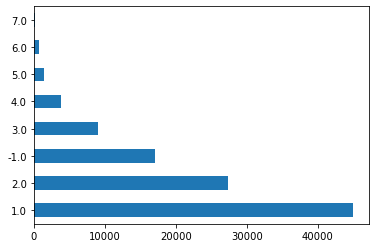

In [24]:
newcensusstudents.TDESP.value_counts().plot(kind='barh')

<AxesSubplot:>

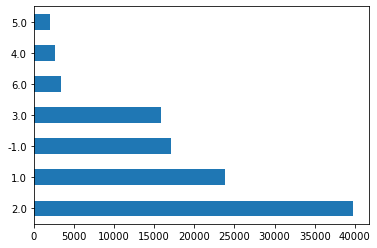

In [25]:
newcensusstudents.MDESP1.value_counts().plot(kind='barh')

In [26]:
speeds2 = []
b = time.time()
np.random.seed(1)
for i in tqdm(range(len(newcensusstudents))):

    tempdf = newcensusstudents.iloc[i,:]
    conditions_speed = [
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 2)),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 1) & ((tempdf.TDESP == 1) | (tempdf.TDESP == 2))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 1) & ((tempdf.TDESP == 3))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 1) & ((tempdf.TDESP == 4) | (tempdf.TDESP == 5) | (tempdf.TDESP == 6) | (tempdf.TDESP == 7))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 3) & ((tempdf.TDESP == 1) | (tempdf.TDESP == 2) | (tempdf.TDESP == 3))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 3) & ((tempdf.TDESP == 4) | (tempdf.TDESP == 5) | (tempdf.TDESP == 6)| (tempdf.TDESP == 7))),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 4)),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 5)),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == 6)),
        ((tempdf.LTRABA != 1) & (tempdf.MDESP1 == -1)),
        ((tempdf.LTRABA == 1))]

    choices_speed = [np.random.choice(PosNormal(2.5, 2.5,1)), np.random.choice(PosNormal(17, 6.5,1)), 
                     np.random.choice(PosNormal(17, 6.5,1)), np.random.choice(PosNormal(22, 6.5,1)), 
                     np.random.choice(PosNormal(12, 6.5,1)), np.random.choice(PosNormal(15, 6.5,1)),
                     np.random.choice(PosNormal(10, 5,1)), np.random.choice(PosNormal(15, 6.5,1)),
                     np.random.choice(PosNormal(10, 5,1)), 0, 0]
    
    choices_speed = [num/60 for num in choices_speed] 

    tempspeed = float(np.select(conditions_speed, choices_speed, 0))
    speeds2.append(tempspeed)
    
print('Duració assignar a cada persona un valor diferent de temps descola és de ' + str(time.time()-b))

100%|██████████| 104570/104570 [02:21<00:00, 739.15it/s] 

Duració assignar a cada persona un valor diferent de temps descola és de 141.4764199256897


In [27]:
newCensusworkers['speed'] = speeds
newcensusstudents['speed'] = speeds2

/tmp/ipykernel_503/1835674951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCensusworkers['speed'] = speeds
/tmp/ipykernel_503/1835674951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcensusstudents['speed'] = speeds2


In [28]:
assert newCensus.shape[0] == newCensusworkers.shape[0] + newcensusnoworkers.shape[0] + newcensusstudents.shape[0]

In [29]:
np.random.seed(1)
newtimes = np.random.gamma(1.8,13,newCensusworkers.shape[0])
newtimes = newtimes.tolist()
lessthan10 = [x for x in newtimes if x < 10]
between10and20 =  [x for x in newtimes if ((x >=10) & (x < 20))]
between20and30 =  [x for x in newtimes if ((x >=20) & (x < 30))]
between30and45 =  [x for x in newtimes if ((x >=30) & (x < 45))]
between45and60 =  [x for x in newtimes if ((x >=45) & (x < 60))]
between60and90 =  [x for x in newtimes if ((x >=60) & (x < 90))]
morethan90 =  [x for x in newtimes if x > 90]
sumsets = len(lessthan10)+len(between10and20)+len(between20and30)+len(between30and45)+len(between45and60)+len(between60and90)+len(morethan90)
print('Sum of all individual lists of ' + str(sumsets) + ', and len of initial gamma distribution of '+ str(len(newtimes)))
len(lessthan10), len(between10and20), len(between20and30), len(between30and45), len(between45and60), len(between60and90), len(morethan90)

Sum of all individual lists of 248673, and len of initial gamma distribution of 248673


(57427, 71721, 50865, 40980, 17314, 9019, 1347)

In [30]:
assert newCensus.shape[0] == newCensusworkers.shape[0] + newcensusnoworkers.shape[0] + newcensusstudents.shape[0]

In [31]:
import random
sets = [lessthan10,between10and20,between20and30,between30and45,between45and60,between60and90,morethan90]
conditions = [
        ((newCensusworkers.LTRABA == 1)),
        ((newCensusworkers.LTRABA != 1) & (newCensusworkers.TDESP == 1)),
        ((newCensusworkers.LTRABA != 1) & (newCensusworkers.TDESP == 2)),
        ((newCensusworkers.LTRABA != 1) & (newCensusworkers.TDESP == 3)),
        ((newCensusworkers.LTRABA != 1) & (newCensusworkers.TDESP == 4)),
        ((newCensusworkers.LTRABA != 1) & (newCensusworkers.TDESP == 5)),
        ((newCensusworkers.LTRABA != 1) & (newCensusworkers.TDESP == 6)),
        ((newCensusworkers.LTRABA != 1) & (newCensusworkers.TDESP == 7))]

choices = [0, np.random.choice(lessthan10), np.random.choice(between10and20), 
           np.random.choice(between20and30), np.random.choice(between30and45), 
           np.random.choice(between45and60), np.random.choice(between60and90), 
           np.random.choice(morethan90)]

times = np.select(conditions, choices, 0)
len(times)

248673

In [32]:
newCensusworkers['time_gamma_separated'] = times 

/tmp/ipykernel_503/2542798966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCensusworkers['time_gamma_separated'] = times


In [33]:
import random
sets = [lessthan10,between10and20,between20and30,between30and45,between45and60,between60and90,morethan90]
conditions = [
        ((newcensusstudents.LTRABA == 1)),
        ((newcensusstudents.LTRABA != 1) & (newcensusstudents.TDESP == 1)),
        ((newcensusstudents.LTRABA != 1) & (newcensusstudents.TDESP == 2)),
        ((newcensusstudents.LTRABA != 1) & (newcensusstudents.TDESP == 3)),
        ((newcensusstudents.LTRABA != 1) & (newcensusstudents.TDESP == 4)),
        ((newcensusstudents.LTRABA != 1) & (newcensusstudents.TDESP == 5)),
        ((newcensusstudents.LTRABA != 1) & (newcensusstudents.TDESP == 6)),
        ((newcensusstudents.LTRABA != 1) & (newcensusstudents.TDESP == 7))]

choices = [0, np.random.choice(lessthan10), np.random.choice(between10and20), 
           np.random.choice(between20and30), np.random.choice(between30and45), 
           np.random.choice(between45and60), np.random.choice(between60and90), 
           np.random.choice(morethan90)]

times = np.select(conditions, choices, 0)
len(times)

104570

In [34]:
newcensusstudents['time_gamma_separated'] = times 

/tmp/ipykernel_503/3782532809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcensusstudents['time_gamma_separated'] = times


In [35]:
assert newCensus.shape[0]==newCensusworkers.shape[0]+newcensusnoworkers.shape[0]+newcensusstudents.shape[0]

In [36]:
conditions = [
    (newCensusworkers['time_gamma_separated'] == 0),
    ((newCensusworkers['time_gamma_separated'] > 0) & (newCensusworkers['time_gamma_separated'] < 10)),
    ((newCensusworkers['time_gamma_separated'] >= 10 ) & (newCensusworkers['time_gamma_separated'] < 20)),
    ((newCensusworkers['time_gamma_separated'] >= 20 ) & (newCensusworkers['time_gamma_separated'] < 30)),
    ((newCensusworkers['time_gamma_separated'] >= 30 ) & (newCensusworkers['time_gamma_separated'] < 45)),
    ((newCensusworkers['time_gamma_separated'] >= 45 ) & (newCensusworkers['time_gamma_separated'] < 60)),
    ((newCensusworkers['time_gamma_separated'] >= 60 ) & (newCensusworkers['time_gamma_separated'] < 90)),
    (newCensusworkers['time_gamma_separated'] >= 90),
]
choices = ['no_viaja', '<10mins', '10-19mins', '20-29mins', '30-44mins', '45-59mins', '1h-1h30mins', '>1h30mins']

newCensusworkers['time_gamma_cat'] = np.select(conditions, choices, 'no_viaja')

/tmp/ipykernel_503/2928720561.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCensusworkers['time_gamma_cat'] = np.select(conditions, choices, 'no_viaja')


In [37]:
conditions = [
    (newcensusstudents['time_gamma_separated'] == 0),
    ((newcensusstudents['time_gamma_separated'] > 0) & (newcensusstudents['time_gamma_separated'] < 10)),
    ((newcensusstudents['time_gamma_separated'] >= 10 ) & (newcensusstudents['time_gamma_separated'] < 20)),
    ((newcensusstudents['time_gamma_separated'] >= 20 ) & (newcensusstudents['time_gamma_separated'] < 30)),
    ((newcensusstudents['time_gamma_separated'] >= 30 ) & (newcensusstudents['time_gamma_separated'] < 45)),
    ((newcensusstudents['time_gamma_separated'] >= 45 ) & (newcensusstudents['time_gamma_separated'] < 60)),
    ((newcensusstudents['time_gamma_separated'] >= 60 ) & (newcensusstudents['time_gamma_separated'] < 90)),
    (newcensusstudents['time_gamma_separated'] >= 90),
]
choices = ['no_viaja', '<10mins', '10-19mins', '20-29mins', '30-44mins', '45-59mins', '1h-1h30mins', '>1h30mins']

newcensusstudents['time_gamma_cat'] = np.select(conditions, choices, 'no_viaja')

/tmp/ipykernel_503/3956268394.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcensusstudents['time_gamma_cat'] = np.select(conditions, choices, 'no_viaja')


In [38]:
newCensusworkers['distances'] = newCensusworkers['time_gamma_separated'] * newCensusworkers['speed']

# newCensusworkers = newCensus[filterWork]
conditions = [
    (newCensusworkers.distances <= 0 ),
    ((newCensusworkers.distances > 0 ) & (newCensusworkers.distances <= 2)),
    ((newCensusworkers.distances > 2 ) & (newCensusworkers.distances <= 5)),
    ((newCensusworkers.distances > 5 ) & (newCensusworkers.distances <= 10)),
    ((newCensusworkers.distances > 10 ) & (newCensusworkers.distances <= 20)),
    ((newCensusworkers.distances > 20 ) & (newCensusworkers.distances <= 50)),
    (newCensusworkers.distances > 50),
]
choices = ['no_viaja', '[0.5,2]', '(2,5]', '(5,10]', '(10,20]', '(20,50]', '>50']

newCensusworkers['distance_categorical'] = np.select(conditions, choices, 'no_viaja')

/tmp/ipykernel_503/3679961174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCensusworkers['distances'] = newCensusworkers['time_gamma_separated'] * newCensusworkers['speed']
/tmp/ipykernel_503/3679961174.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCensusworkers['distance_categorical'] = np.select(conditions, choices, 'no_viaja')


In [39]:
newcensusstudents['distances'] = newcensusstudents['time_gamma_separated'] * newcensusstudents['speed']

# newCensusworkers = newCensus[filterWork]
conditions = [
    (newcensusstudents.distances <= 0 ),
    ((newcensusstudents.distances > 0 ) & (newcensusstudents.distances <= 2)),
    ((newcensusstudents.distances > 2 ) & (newcensusstudents.distances <= 5)),
    ((newcensusstudents.distances > 5 ) & (newcensusstudents.distances <= 10)),
    ((newcensusstudents.distances > 10 ) & (newcensusstudents.distances <= 20)),
    ((newcensusstudents.distances > 20 ) & (newcensusstudents.distances <= 50)),
    (newcensusstudents.distances > 50),
]
choices = ['no_viaja', '[0.5,2]', '(2,5]', '(5,10]', '(10,20]', '(20,50]', '>50']

newcensusstudents['distance_categorical'] = np.select(conditions, choices, 'no_viaja')

/tmp/ipykernel_503/1107708269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcensusstudents['distances'] = newcensusstudents['time_gamma_separated'] * newcensusstudents['speed']
/tmp/ipykernel_503/1107708269.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcensusstudents['distance_categorical'] = np.select(conditions, choices, 'no_viaja')


<AxesSubplot:>

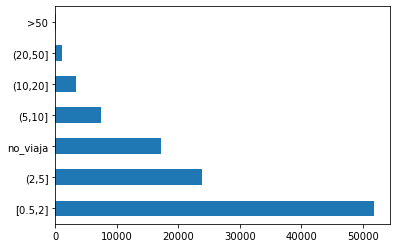

In [40]:
newcensusstudents['distance_categorical'].value_counts().plot(kind='barh')

In [41]:
assert newCensus.shape[0] == newCensusworkers.shape[0] + newcensusnoworkers.shape[0] + newcensusstudents.shape[0]

In [42]:
newCensusnoworkers['speed'] = np.zeros(newCensusnoworkers.shape[0]) 
newCensusnoworkers['distances'] = np.zeros(newCensusnoworkers.shape[0])
newCensusnoworkers['distance_categorical'] = 'no_viaja'
newCensusnoworkers['time_gamma_cat'] = 'no_viaja'
newCensusnoworkers['time_gamma_separated'] = np.zeros(newCensusnoworkers.shape[0])

/tmp/ipykernel_503/2422516589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCensusnoworkers['speed'] = np.zeros(newCensusnoworkers.shape[0])
/tmp/ipykernel_503/2422516589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCensusnoworkers['distances'] = np.zeros(newCensusnoworkers.shape[0])
/tmp/ipykernel_503/2422516589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [43]:
dfs = [newCensusworkers, newcensusnoworkers, newcensusstudents]
newCensusnew = pd.concat(dfs)

In [44]:
newCensus = newCensus.sort_index()
newCensusnew = newCensusnew.sort_index()

In [45]:
assert newCensusnew.shape[0] == newCensus.shape[0]

In [46]:
newCensusnew.shape, newCensus.shape

((622070, 149), (622070, 144))

In [47]:
newCensusnew.head()

NSS  HUECO  CPRO   ABS  IDHUECO  NORDEN    FACTOR  MNAC  ANAC  EDAD  ...  \
0  5189  00242     8   176       18       3  1.979276     1  1913    98  ...   
1  5189  00242     8   176       18       2  1.979276    11  1945    65  ...   
2  5189  00242     8   176       18       1  1.979276    11  1974    36  ...   
3  5437  A0265     8  1027       19       2  5.132353    10  1919    92  ...   
4  5437  A0265     8  1027       19       1  5.132353     1  1913    98  ...   

   NHIJOC  FAMNUM  TIPOPARECIV TIPOPARSEX DIFEDAD  speed  \
0                                                    NaN   
1       0      01           01         01      07    NaN   
2       0      01           01         01      07    NaN   
3       0      01           01         01      06    NaN   
4       0      01           01         01      06    NaN   

   time_gamma_separated  time_gamma_cat  distances  distance_categorical  
0                   NaN             NaN        NaN                   NaN  
1                   NaN             NaN        NaN                   NaN  
2                   NaN             NaN        NaN                   NaN  
3                   NaN             NaN        NaN                   NaN  
4                   NaN             NaN        NaN                   NaN  

[5 rows x 149 columns]

In [48]:
newCensus.head()

NSS  HUECO  CPRO   ABS  IDHUECO  NORDEN    FACTOR  MNAC  ANAC  EDAD  ...  \
0  5189  00242     8   176       18       3  1.979276     1  1913    98  ...   
1  5189  00242     8   176       18       2  1.979276    11  1945    65  ...   
2  5189  00242     8   176       18       1  1.979276    11  1974    36  ...   
3  5437  A0265     8  1027       19       2  5.132353    10  1919    92  ...   
4  5437  A0265     8  1027       19       1  5.132353     1  1913    98  ...   

   SITUCON  SITPCON  TIPONUC TAMNUC NHIJO  NHIJOC  FAMNUM  TIPOPARECIV  \
0                                                                        
1        9        8        1     01     0       0      01           01   
2        7        8        1     01     0       0      01           01   
3        7        8        1     01     0       0      01           01   
4        7        8        1     01     0       0      01           01   

   TIPOPARSEX  DIFEDAD  
0                       
1          01       07  
2          01       07  
3          01       06  
4          01       06  

[5 rows x 144 columns]

Now we transform distance categorical to a numerical categorical variable.
* no_viaja -> -1
* '0.5-2' -> 1
* '2-5' -> 2
* '5-10' -> 3
* '10-20' -> 4
* '20-50' -> 5
* '>50' -> 6

In [49]:
newCensusnew.distance_categorical.unique()

array([nan, 'no_viaja', '[0.5,2]', '(5,10]', '(2,5]', '(10,20]',
       '(20,50]', '>50'], dtype=object)

In [50]:
conditions = [
    (newCensusnew.distance_categorical == 'no_viaja' ),
    (newCensusnew.distance_categorical == '[0.5,2]'),
    (newCensusnew.distance_categorical == '(2,5]'),
    (newCensusnew.distance_categorical == '(5,10]'),
    (newCensusnew.distance_categorical == '(10,20]'),
    (newCensusnew.distance_categorical == '(20,50]'),
    (newCensusnew.distance_categorical == '>50')]

choices = [-1, 1, 2, 3, 4, 5, 6]
newCensusnew['distance_categorical_num'] = np.select(conditions, choices, -1)
print(newCensusnew['distance_categorical_num'].unique())
newCensusnew['distance_categorical_num'] = newCensusnew['distance_categorical_num'].astype(int)

[-1  1  3  2  4  5  6]


In [51]:
newCensusnew.dtypes

NSS                           int64
HUECO                        object
CPRO                          int64
ABS                           int64
IDHUECO                       int64
                             ...   
time_gamma_separated        float64
time_gamma_cat               object
distances                   float64
distance_categorical         object
distance_categorical_num      int64
Length: 150, dtype: object

#### Lets now check university students

In [52]:
filterdiplomatura = (newCensusnew.ESCUR1 == 8) & (newCensusnew['RELA'] != 1) & (newCensusnew['LTRABA'] != 1)
filtergrau = (newCensusnew.ESCUR1 == 9) & (newCensusnew['RELA'] != 1) & (newCensusnew['LTRABA'] != 1)
filterlicenciatura = (newCensusnew.ESCUR1 == 10) & (newCensusnew['RELA'] != 1) & (newCensusnew['LTRABA'] != 1)
filtermaster = (newCensusnew.ESCUR1 == 11) & (newCensusnew['RELA'] != 1) & (newCensusnew['LTRABA'] != 1)
filterdoctorado = (newCensusnew.ESCUR1 == 12) & (newCensusnew['RELA'] != 1) & (newCensusnew['LTRABA'] != 1)

# filterdiplomatura = (newCensusnew.ESCUR1 == 8) & (newCensusnew['RELA'] != 1)
# filtergrau = (newCensusnew.ESCUR1 == 9) & (newCensusnew['RELA'] != 1)
# filterlicenciatura = (newCensusnew.ESCUR1 == 10) & (newCensusnew['RELA'] != 1)
# filtermaster = (newCensusnew.ESCUR1 == 11) & (newCensusnew['RELA'] != 1)
# filterdoctorado = (newCensusnew.ESCUR1 == 12) & (newCensusnew['RELA'] != 1)
dfdiplomatura = newCensusnew[filterdiplomatura]
dfgrau = newCensusnew[filtergrau]
dflicenciatura = newCensusnew[filterlicenciatura]
dfmaster = newCensusnew[filtermaster]
dfdoctorado = newCensusnew[filterdoctorado]
graumasterdiplicdoc = pd.concat([dfgrau,dflicenciatura,dfdiplomatura,dfmaster,dfdoctorado], axis=0)
graumasterdiplicdoc.FACTOR.sum()

141232.550704973

In [53]:
filterUNI =  ((newCensusnew.ESCUR1 == 8) | (newCensusnew.ESCUR1 == 9) | (newCensusnew.ESCUR1 == 10) | (newCensusnew.ESCUR1 == 11) | (newCensusnew.ESCUR1 == 12)) & (newCensusnew['RELA'] != 1) & (newCensusnew['LTRABA'] != 1)

In [54]:
newCensusunis = newCensusnew[filterUNI]
newCensusunis.FACTOR.sum()

141232.550704973

In [55]:
assert newCensusunis.FACTOR.sum() == graumasterdiplicdoc.FACTOR.sum()

In [56]:
print('There are ' +str(dfdiplomatura.FACTOR.sum()) + ' people studying diplomatura')
print('There are ' +str(dfgrau.FACTOR.sum()) + ' people studying grau')
print('There are ' +str(dflicenciatura.FACTOR.sum()) + ' people studying licenciatura')
print('There are ' +str(dfmaster.FACTOR.sum()) + ' people studying master')
print('There are ' +str(dfdoctorado.FACTOR.sum()) + ' people studying doctorado')

There are 20459.0339093488 people studying diplomatura
There are 59104.2819524433 people studying grau
There are 43077.2778150908 people studying licenciatura
There are 15218.436624615 people studying master
There are 3373.5204034751 people studying doctorado


There are 141232.550704973 people studying grau or master


<AxesSubplot:>

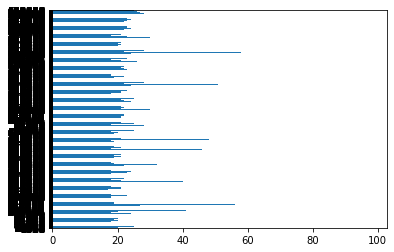

In [57]:
print('There are ' +str(graumasterdiplicdoc.FACTOR.sum()) + ' people studying grau or master')
graumasterdiplicdoc.EDAD.plot(kind='barh')

In [58]:
dfestudis = pd.read_csv('estudiants.csv', sep=',')
dfestudis['Alumnes residents (2)'].sum(), dfestudis['Llocs destudi localitzats (1)'].sum()
dfestudis['% alumnes'] = dfestudis['Alumnes residents (2)']/dfestudis['Alumnes residents (2)'].sum()
dfestudis['valor cens'] = round(dfestudis['% alumnes'] * graumasterdiplicdoc.FACTOR.sum(),0).astype(int)
dfestudis['valor cens'].sum() , graumasterdiplicdoc.FACTOR.sum()

(141236, 141232.550704973)

#### Create 400k peopple arrays from inut file

In [59]:
# newCensus['CNO']  = newCensus['CNO'].replace(r'^\s*$', -1, regex=True).astype(int)
# newCensus['CNAE'] = newCensus['CNAE'].replace(r'^\s*$', -1, regex=True).astype(int)

homeID400k = newCensusnew['IDHUECO'].to_numpy()
age400k = newCensusnew['EDAD'].to_numpy()
gender400k = newCensusnew['SEXO'].to_numpy()
abs400k = newCensusnew['ABS'].to_numpy()
factor400k = round(newCensusnew['FACTOR']).to_numpy(dtype=int)
jobStatus400k = newCensusnew['RELA'].to_numpy(dtype=int, na_value=-1)
jobLocation400k = newCensusnew['LTRABA'].to_numpy(dtype=int, na_value=-1)
timeToWork400k = newCensusnew['TDESP'].to_numpy(dtype=int, na_value=-1)
homeOccupancy400k = newCensusnew['NMIEM'].to_numpy(dtype=int, na_value=-1)
CNO400k = newCensusnew['CNO'].to_numpy(dtype=int, na_value=-1)
CNAE400k = newCensusnew['CNAE'].to_numpy(dtype=int, na_value=-1)
CATDIST400k = newCensusnew['distance_categorical_num'].to_numpy(dtype=int, na_value=-1)
estudis400k = newCensusnew['ESCUR1'].to_numpy(dtype=int, na_value=-1)

if cells_to_run == 'ALL':
    print('Home ID:', homeID400k)
    print('Age:', age400k)
    print('Gender:', gender400k)
    print('ABS:', abs400k)
    print('Factor:', factor400k)
    print('Job status:', jobStatus400k)
    print('Job location:', jobLocation400k)
    print('Time to work:', timeToWork400k)
    print('Home occupancy:', homeOccupancy400k)
    print('CNO:', CNO400k)
    print('CNAE:', CNAE400k)
    print('Distance to work:', CATDIST400k)
    print('Estudis:', estudis400k)
else: pass

Home ID: [     18      18      18 ... 1621638 1621638 1621638]
Age: [98 65 36 ...  0 15 28]
Gender: [1 1 6 ... 6 6 6]
ABS: [176 176 176 ... 340 340 340]
Factor: [2 2 2 ... 7 7 7]
Job status: [ 5  5  6 ... -1 -1  5]
Job location: [-1 -1 -1 ...  1  1 -1]
Time to work: [-1 -1 -1 ... -1 -1 -1]
Home occupancy: [3 3 3 ... 7 7 7]
CNO: [-1 -1 -1 ... -1 -1 -1]
CNAE: [-1 -1 -1 ... -1 -1 -1]
Distance to work: [-1 -1 -1 ... -1 -1 -1]
Estudis: [-1 -1 -1 ... -1 -1 -1]


#### Create 5M people world from previous arrays (using factor400k)

In [60]:
numPeople5M = int(factor400k.sum())
if cells_to_run == 'ALL':
    print('Full world will have', numPeople5M, 'people')
else: pass

homeID5M         = np.empty(numPeople5M, dtype=int)
age5M            = np.empty(numPeople5M, dtype=int)
gender5M         = np.empty(numPeople5M, dtype=int)
ABS5M            = np.empty(numPeople5M, dtype=object) 
jobStatus5M      = np.empty(numPeople5M, dtype=int)
jobLocation5M    = np.empty(numPeople5M, dtype=int)
timeToWork5M     = np.empty(numPeople5M, dtype=int)
homeOccupancy5M  = np.empty(numPeople5M, dtype=int)
CNO5M            = np.empty(numPeople5M, dtype=int)
CNAE5M           = np.empty(numPeople5M, dtype=int)
distancetowork5M = np.empty(numPeople5M, dtype=int)
estudis5M        = np.empty(numPeople5M, dtype=int)

iCounter = 0
for iPeople in range(numPeople400k):    
    for iFactor in range(factor400k[iPeople]):
        
        homeID5M[iCounter]         = homeID400k[iPeople] * 1000 + iFactor
        age5M[iCounter]            = age400k[iPeople]
        gender5M[iCounter]         = gender400k[iPeople]
        ABS5M[iCounter]            = abs400k[iPeople]        
        jobStatus5M[iCounter]      = jobStatus400k[iPeople]        
        jobLocation5M[iCounter]    = jobLocation400k[iPeople]        
        timeToWork5M[iCounter]     = timeToWork400k[iPeople]        
        homeOccupancy5M[iCounter]  = homeOccupancy400k[iPeople]        
        CNO5M[iCounter]            = CNO400k[iPeople] 
        CNAE5M[iCounter]           = CNAE400k[iPeople]
        distancetowork5M[iCounter] = CATDIST400k[iPeople]
        estudis5M[iCounter]        = estudis400k[iPeople]
        iCounter += 1 

# Create and fill the dataframe    
data = {'HomeID': homeID5M, \
        'Age': age5M, \
        'Gender': gender5M, \
        'HomeRegion': ABS5M, \
        'JobStatus': jobStatus5M, \
        'JobLocation': jobLocation5M, \
        'TimeToWork': timeToWork5M, \
        'HomeOccupancy': homeOccupancy5M, \
        'CNO': CNO5M, \
        'CNAE': CNAE5M , \
        'distancetowork5M' : distancetowork5M, \
        'estudis5M' : estudis5M}
        
dfWorld5M = pd.DataFrame(data)
dfWorld5M = dfWorld5M.sort_values(by=['HomeRegion'], ignore_index = True)

Full world will have 7472977 people


#### Recreate arrays

In [61]:
homeID5M = dfWorld5M['HomeID'].to_numpy()
age5M = dfWorld5M['Age'].to_numpy()
ABS5M = dfWorld5M['HomeRegion'].to_numpy()
gender5M = dfWorld5M['Gender'].to_numpy()
jobStatus5M = dfWorld5M['JobStatus'].to_numpy()
jobLocation5M = dfWorld5M['JobLocation'].to_numpy()
timeToWork5M = dfWorld5M['TimeToWork'].to_numpy()
homeOccupancy5M = dfWorld5M['HomeOccupancy'].to_numpy()
CNO5M  = dfWorld5M['CNO'].to_numpy()
CNAE5M = dfWorld5M['CNAE'].to_numpy()
distancetowork5M = dfWorld5M['distancetowork5M'].to_numpy()
estudis5M = dfWorld5M['estudis5M'].to_numpy()

if cells_to_run == 'ALL':
    print('Home ID:', homeID5M)
    print('Age:', age5M)
    print('Home region:', ABS5M)
    print('Gender:', gender5M)
    print('Job status:', jobStatus5M)
    print('Job location:', jobLocation5M)
    print('Time to work:', timeToWork5M)
    print('Home occupancy:', homeOccupancy5M)
    print('CNO:', CNO5M)
    print('CNAE:', CNAE5M)
    print('distancetowork5M:', distancetowork5M)
    print('estudis5M:', estudis5M)
else: pass

Home ID: [1598405006  893950003  893950004 ...  127241030  127241004  954941011]
Age: [51 42 42 ... 45 45  0]
Home region: [9 9 9 ... 1087 1087 1087]
Gender: [6 1 1 ... 1 6 6]
Job status: [ 1  1  1 ...  1  1 -1]
Job location: [3 3 3 ... 4 4 3]
Time to work: [2 1 1 ... 3 2 2]
Home occupancy: [2 4 4 ... 2 2 3]
CNO: [92 73 73 ... 71 36 -1]
CNAE: [81 25 25 ... 41 56 -1]
distancetowork5M: [1 2 2 ... 4 1 1]
estudis5M: [-1 -1 -1 ... -1 -1 -1]


#### Create list of regions

In [62]:
absList = dfWorld5M['HomeRegion'].unique()
nABS = len(absList)
if cells_to_run == 'ALL':
    print('There are', nABS, 'ABS:\n')

    peoplePerABS = dfWorld5M['HomeRegion'].value_counts()[absList]
    print(peoplePerABS)
else: pass

There are 246 ABS:

9       22924
13      47503
15      30433
17      22348
19      23482
        ...  
1083    44942
1084    29593
1085    37144
1086    32348
1087    35741
Name: HomeRegion, Length: 246, dtype: int64


#### From grouped ABS to individual ABS

In [63]:
np.random.seed(10)
NSSlist = dfWorld5M.HomeID.unique().tolist()
# print(len(NSSlist))
randomprob = []
for i in NSSlist:
    r = np.random.rand()
    randomprob.append(r)

# len(randomprob)
type(NSSlist), type(randomprob)

randomP = pd.DataFrame({'HomeID':NSSlist, 'randomprobabs':randomprob})

dfWorld5M = dfWorld5M.merge(randomP, how='left')

In [64]:
file_ABSstructure = "/data/ifaecovid/common/Census/NewCensus/Matriz_propuesta_agrupación_ABS_formatted_forPython.csv" # Census file with individual a
dfABSstructure = pd.read_csv(file_ABSstructure,sep = ',',decimal=',')

dfABSstructure = dfABSstructure.sort_values('Código ABS Original')
dfABSstructure = dfABSstructure.rename(columns={'Código ABS Original':'Código_ABS_Original', \
                                                'Código ABS Agrupada':'Código_ABS_Agrupada', \
                                                'Población original':'Población_original'})

In [65]:
# weight each of the individual ABS of each ABS agrupada and weight them according to the population they represent in total 
dfABSstructure2 = dfABSstructure.copy()

def weighter(dfABSstructure2):
    ABSAgrupades = dfABSstructure2.Código_ABS_Agrupada.unique()
    weightedlist = []
    for i in ABSAgrupades:
        filterABSagrupada = dfABSstructure2.Código_ABS_Agrupada == i
        df = dfABSstructure2[filterABSagrupada]
        sumpob = np.sum(dfABSstructure2[filterABSagrupada].Población_original)
        df['weight'] = df['Población_original'] / sumpob
        df = df.sort_values('weight')
        df['cumweight'] = df.weight.cumsum()
        weightedlist.append(df)
    dfABSstructure2 = pd.concat(weightedlist, axis=0, ignore_index=True)
    return dfABSstructure2
weightsABS = weighter(dfABSstructure2)

/tmp/ipykernel_503/410857712.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = df['Población_original'] / sumpob


In [66]:
weightsABS = weightsABS.rename(columns={'Código_ABS_Agrupada':'ABS'})
weightsABS.sort_values(['ABS'])
ABSweightsABS = weightsABS['ABS'].unique().tolist()

In [67]:
dfWorld5M.sort_values('HomeID')

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
2017178       18000   36       6        176          6           -1   
2017161       18000   65       1        176          5           -1   
2034903       18000   98       1        176          5           -1   
2017177       18001   36       6        176          6           -1   
2017162       18001   65       1        176          5           -1   
...             ...  ...     ...        ...        ...          ...   
3761458  1621638006   15       6        340         -1            1   
3762836  1621638006   53       6        340          6           -1   
3761451  1621638006    0       6        340         -1            1   
3770863  1621638006   28       6        340          5           -1   
3761472  1621638006   51       1        340          5           -1   

         TimeToWork  HomeOccupancy  CNO  CNAE  distancetowork5M  estudis5M  \
2017178          -1              3   -1    -1                -1         -1   
2017161          -1              3   -1    -1                -1         -1   
2034903          -1              3   -1    -1                -1         -1   
2017177          -1              3   -1    -1                -1         -1   
2017162          -1              3   -1    -1                -1         -1   
...             ...            ...  ...   ...               ...        ...   
3761458          -1              7   -1    -1                -1         -1   
3762836          -1              7   -1    -1                -1         -1   
3761451          -1              7   -1    -1                -1         -1   
3770863          -1              7   -1    -1                -1         -1   
3761472          -1              7   -1    -1                -1         -1   

         randomprobabs  
2017178       0.386086  
2017161       0.386086  
2034903       0.386086  
2017177       0.504226  
2017162       0.504226  
...                ...  
3761458       0.059872  
3762836       0.059872  
3761451       0.059872  
3770863       0.059872  
3761472       0.059872  

[7472977 rows x 13 columns]

In [68]:
np.random.seed(19750)
# dfWorld5M['individualABS'] = np.zeros(newCensus.shape[0])

def weighterCensus(census, weighter):
    ABSagrupadesC = dfWorld5M.HomeRegion.unique().tolist()
    ABSagrupadesW = weighter.ABS.unique().tolist()
    ABSagrupadesC.sort(reverse=True)
    ABSagrupadesW.sort(reverse=True)
    newCensus = []
    for i, j in zip(ABSagrupadesC, ABSagrupadesW):
        filterABSagrupadaC = census.HomeRegion == i
        dfc = census[filterABSagrupadaC]
        filterABSagrupadaW = weighter.ABS == j
        dfw = weighter[filterABSagrupadaW].sort_values('Población_original', ascending=False)
        wei = dfw.cumweight.unique().round(6)
        abss = dfw.Código_ABS_Original.unique().tolist()
        nameabss = dfw.Nombre.unique().tolist()
        dfc['individualABS'] = np.digitize(dfc.randomprobabs, bins = wei, right=True)
        dict_name = dict(zip(abss, nameabss))
        valco = dfc.individualABS.value_counts().index.tolist()
        cat_ = dfc['individualABS'].unique().tolist()
        dict_ = dict(zip(valco, abss))
        dfc = dfc.replace({'individualABS':dict_})
        dfc["name_abs"]= dfc["individualABS"].map(dict_name)
        newCensus.append(dfc)
    newcensus = pd.concat(newCensus, axis=0, ignore_index=True)
    return newcensus

dfWorld5M = weighterCensus(dfWorld5M, weightsABS)
dfWorld5M.individualABS.nunique(), weightsABS.Código_ABS_Original.nunique()

/tmp/ipykernel_503/780683896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['individualABS'] = np.digitize(dfc.randomprobabs, bins = wei, right=True)


(374, 374)

##### Validation of reconstructed ABS

In [69]:
popABS = dfWorld5M.groupby('individualABS')['Age'].count().reset_index().rename(columns={"Age": "pop"})
popABS.head(20)
popABS.to_csv('popABS.csv', sep=',')

In [70]:
dfWorld5M2 = dfWorld5M.copy()
dfWorld5M2.HomeRegion = dfWorld5M2.HomeRegion.astype(int)
dfWorld5M2.columns
weightsABS.ABS = weightsABS.ABS.astype(int)

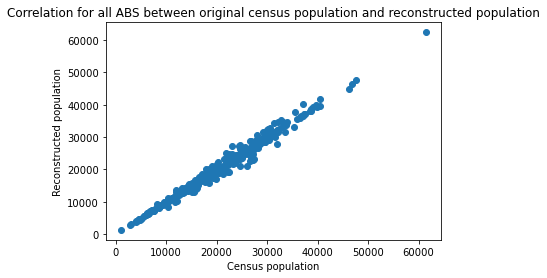

Correlació entre població Cens vs població Censada és de 0.992


In [71]:
# scatter plot población censo vs ABS todas
import matplotlib.pyplot as plt
series = dfWorld5M2['individualABS'].value_counts()
series = series.sort_index()
series.index = series.index.astype(int)
weightsABS = weightsABS.sort_values('Código_ABS_Original')
weightsABS = weightsABS.merge(series, left_on = 'Código_ABS_Original', right_on=series.index)
plt.scatter(weightsABS.Población_original, weightsABS['individualABS'])
plt.xlabel('Census population')
plt.ylabel('Reconstructed population')
plt.title("Correlation for all ABS between original census population and reconstructed population")
plt.show()
print('Correlació entre població Cens vs població Censada és de ' + str(round(weightsABS['Población_original'].corr(weightsABS['individualABS']), 4)))

216
216


/nfs/pic.es/user/a/aoros/.local/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


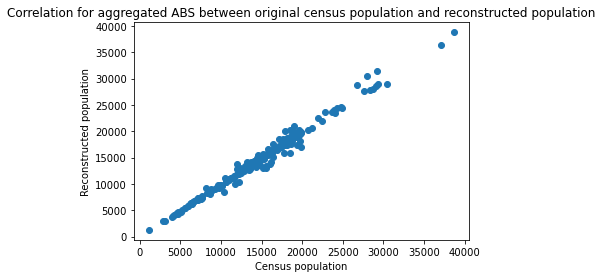

Correlació entre població Cens vs poblacions originals és de 0.9926


In [72]:
# scatter plot población censo vs ABS agrupadas
filteragrupadesc = dfWorld5M2.HomeRegion >= 1000
dfWorldagrupades = dfWorld5M2[filteragrupadesc]
filteragrupadesw = weightsABS.ABS >= 1000
weightsagrupades = weightsABS[filteragrupadesw]
weightsagrupades.Código_ABS_Original = weightsagrupades.Código_ABS_Original.astype(int)
series = dfWorldagrupades.individualABS.value_counts()
series.index = series.index.astype(int)
# print(series)
print(len(series))
print(weightsagrupades.Código_ABS_Original.nunique())
series = series.sort_index()
weightsagrupades = weightsagrupades.sort_values('Código_ABS_Original')
weightsagrupades = weightsagrupades.merge(series, left_on = 'Código_ABS_Original', right_on=series.index)
plt.scatter(weightsagrupades.Población_original, weightsagrupades.individualABS_x)
plt.xlabel('Census population')
plt.ylabel('Reconstructed population')
plt.title("Correlation for aggregated ABS between original census population and reconstructed population")
plt.show()
print('Correlació entre població Cens vs poblacions originals és de ' + str(round(weightsagrupades['Población_original'].corr(weightsagrupades['individualABS_x']), 4)))

158
158


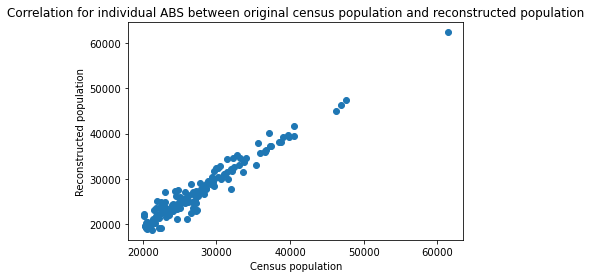

Correlació entre població Cens vs població original Toni és de 0.9734


In [73]:
# scatter plot población censo vs ABS individuales
dfWorldind = dfWorld5M2[~filteragrupadesc]
weightsind = weightsABS[~filteragrupadesw]
series = dfWorldind.individualABS.value_counts()
series.index = series.index.astype(int)
print(len(series))
print(weightsind.Código_ABS_Original.nunique())
series = series.sort_index()
weightsind = weightsind.sort_values('Código_ABS_Original')
weightsind = weightsind.merge(series, left_on = 'Código_ABS_Original', right_on=series.index)
plt.scatter(weightsind.Población_original, weightsind.individualABS_x)
plt.xlabel('Census population')
plt.ylabel('Reconstructed population')
plt.title("Correlation for individual ABS between original census population and reconstructed population")
plt.show()
print('Correlació entre població Cens vs població original Toni és de ' + str(round(weightsind['Población_original'].corr(weightsind['individualABS_x']), 4)))

In [74]:
dfWorld5M

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
0         840190003   75       6       1087          6           -1   
1        1318467011   12       1       1087         -1            4   
2        1318467012   12       1       1087         -1            4   
3         729502001   61       6       1087          5           -1   
4        1318467010   12       1       1087         -1            4   
...             ...  ...     ...        ...        ...          ...   
7472972  1382340006   63       6          9          1            1   
7472973  1382340005   63       6          9          1            1   
7472974  1539904006   11       1          9         -1            4   
7472975  1539904005   11       1          9         -1            4   
7472976  1539948001   46       1          9          1            4   

         TimeToWork  HomeOccupancy  CNO  CNAE  distancetowork5M  estudis5M  \
0                -1              2   -1    -1                -1         -1   
1                 2              5   -1    -1                 2         -1   
2                 2              5   -1    -1                 2         -1   
3                -1              3   -1    -1                -1         -1   
4                 2              5   -1    -1                 2         -1   
...             ...            ...  ...   ...               ...        ...   
7472972          -1              2   12    91                -1         -1   
7472973          -1              2   12    91                -1         -1   
7472974           1              4   -1    -1                 2         -1   
7472975           1              4   -1    -1                 2         -1   
7472976           2              4   35    46                 2         -1   

         randomprobabs  individualABS                   name_abs  
0             0.264940            209  SANT FELIU DE LLOBREGAT 1  
1             0.100351            209  SANT FELIU DE LLOBREGAT 1  
2             0.040465            209  SANT FELIU DE LLOBREGAT 1  
3             0.615112            213          SANT JOAN DESPÍ 1  
4             0.339239            209  SANT FELIU DE LLOBREGAT 1  
...                ...            ...                        ...  
7472972       0.136101              9               RENYS DE MAR  
7472973       0.523608              9               RENYS DE MAR  
7472974       0.254178              9               RENYS DE MAR  
7472975       0.851678              9               RENYS DE MAR  
7472976       0.786374              9               RENYS DE MAR  

[7472977 rows x 15 columns]

In [75]:
dfWorld5M['individualABS'] = dfWorld5M['individualABS'].astype(str)

In [76]:
dfWorld5M

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
0         840190003   75       6       1087          6           -1   
1        1318467011   12       1       1087         -1            4   
2        1318467012   12       1       1087         -1            4   
3         729502001   61       6       1087          5           -1   
4        1318467010   12       1       1087         -1            4   
...             ...  ...     ...        ...        ...          ...   
7472972  1382340006   63       6          9          1            1   
7472973  1382340005   63       6          9          1            1   
7472974  1539904006   11       1          9         -1            4   
7472975  1539904005   11       1          9         -1            4   
7472976  1539948001   46       1          9          1            4   

         TimeToWork  HomeOccupancy  CNO  CNAE  distancetowork5M  estudis5M  \
0                -1              2   -1    -1                -1         -1   
1                 2              5   -1    -1                 2         -1   
2                 2              5   -1    -1                 2         -1   
3                -1              3   -1    -1                -1         -1   
4                 2              5   -1    -1                 2         -1   
...             ...            ...  ...   ...               ...        ...   
7472972          -1              2   12    91                -1         -1   
7472973          -1              2   12    91                -1         -1   
7472974           1              4   -1    -1                 2         -1   
7472975           1              4   -1    -1                 2         -1   
7472976           2              4   35    46                 2         -1   

         randomprobabs individualABS                   name_abs  
0             0.264940           209  SANT FELIU DE LLOBREGAT 1  
1             0.100351           209  SANT FELIU DE LLOBREGAT 1  
2             0.040465           209  SANT FELIU DE LLOBREGAT 1  
3             0.615112           213          SANT JOAN DESPÍ 1  
4             0.339239           209  SANT FELIU DE LLOBREGAT 1  
...                ...           ...                        ...  
7472972       0.136101             9               RENYS DE MAR  
7472973       0.523608             9               RENYS DE MAR  
7472974       0.254178             9               RENYS DE MAR  
7472975       0.851678             9               RENYS DE MAR  
7472976       0.786374             9               RENYS DE MAR  

[7472977 rows x 15 columns]

In [77]:
### Adding comarca column for later use for university students
comarques_abs = pd.read_csv('abs_comarques_definitiu.csv', sep=';')
comarques_abs['Codi ABS'] = comarques_abs['Codi ABS'].astype(str).str.zfill(3)
# dfWorld5M = dfWorld5M.merge(comarques_abs, left_on = 'individualABS', right_on = 'Codi ABS')
# dfWorld5M = dfWorld5M.drop(columns=['Codi ABS', 'Nom ABS'])
dfWorld5M

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
0         840190003   75       6       1087          6           -1   
1        1318467011   12       1       1087         -1            4   
2        1318467012   12       1       1087         -1            4   
3         729502001   61       6       1087          5           -1   
4        1318467010   12       1       1087         -1            4   
...             ...  ...     ...        ...        ...          ...   
7472972  1382340006   63       6          9          1            1   
7472973  1382340005   63       6          9          1            1   
7472974  1539904006   11       1          9         -1            4   
7472975  1539904005   11       1          9         -1            4   
7472976  1539948001   46       1          9          1            4   

         TimeToWork  HomeOccupancy  CNO  CNAE  distancetowork5M  estudis5M  \
0                -1              2   -1    -1                -1         -1   
1                 2              5   -1    -1                 2         -1   
2                 2              5   -1    -1                 2         -1   
3                -1              3   -1    -1                -1         -1   
4                 2              5   -1    -1                 2         -1   
...             ...            ...  ...   ...               ...        ...   
7472972          -1              2   12    91                -1         -1   
7472973          -1              2   12    91                -1         -1   
7472974           1              4   -1    -1                 2         -1   
7472975           1              4   -1    -1                 2         -1   
7472976           2              4   35    46                 2         -1   

         randomprobabs individualABS                   name_abs  
0             0.264940           209  SANT FELIU DE LLOBREGAT 1  
1             0.100351           209  SANT FELIU DE LLOBREGAT 1  
2             0.040465           209  SANT FELIU DE LLOBREGAT 1  
3             0.615112           213          SANT JOAN DESPÍ 1  
4             0.339239           209  SANT FELIU DE LLOBREGAT 1  
...                ...           ...                        ...  
7472972       0.136101             9               RENYS DE MAR  
7472973       0.523608             9               RENYS DE MAR  
7472974       0.254178             9               RENYS DE MAR  
7472975       0.851678             9               RENYS DE MAR  
7472976       0.786374             9               RENYS DE MAR  

[7472977 rows x 15 columns]

#### Worker's world

In [78]:
conditions = [
    (dfWorld5M.distancetowork5M == -1),
    (dfWorld5M.distancetowork5M == 1 ),
    (dfWorld5M.distancetowork5M == 2 ),
    (dfWorld5M.distancetowork5M == 3 ),
    (dfWorld5M.distancetowork5M == 4 ),
    (dfWorld5M.distancetowork5M == 5 ),
    (dfWorld5M.distancetowork5M == 6 )]

choices = ['no_viaja' , '[0.5,2]','(2,5]', '(5,10]', '(10,20]', '(20,50]', '>50']
dfWorld5M['distancetowork5M'] = np.select(conditions, choices, 'no_viaja')
dfWorld5M['distancetowork5M'] = dfWorld5M['distancetowork5M'].astype(str)

In [79]:
dfWorld5M.iloc[:,12] = dfWorld5M.iloc[:,12].astype(str).str.zfill(3)
dfWorld5M = dfWorld5M.sort_values('individualABS')

In [80]:
np.random.seed(1)
dfWorld5M['randomProb'] = np.random.rand(dfWorld5M.shape[0])
dfWorld5M.randomProb.nunique()

7472977

In [81]:
dfWorld5M

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
2490034   563230009   47       6       1019          1            3   
2463356  1172537028   31       1       1019          1            3   
2487900    77594009   24       1       1019          6            3   
2487896    77594005   24       1       1019          6            3   
2463374  1172537015   31       1       1019          1            3   
...             ...  ...     ...        ...        ...          ...   
2102934   890879004   62       1       1029          1            4   
2102933   890879005   62       1       1029          1            4   
2102931   549662004   13       1       1029         -1            3   
2102927   890879003   44       1       1029          1            3   
2100306  1555706001   36       1       1029          1            2   

         TimeToWork  HomeOccupancy  CNO  CNAE distancetowork5M  estudis5M  \
2490034           1              3   95     1            (2,5]         -1   
2463356           2              1   38    20            (2,5]         -1   
2487900           1              5   -1    -1         no_viaja         15   
2487896           1              5   -1    -1         no_viaja         15   
2463374           2              1   38    20            (2,5]         -1   
...             ...            ...  ...   ...              ...        ...   
2102934           6              2   35    96          (10,20]          9   
2102933           6              2   35    96          (10,20]          9   
2102931           2              4   -1    -1          [0.5,2]         -1   
2102927           2              2   31    43          [0.5,2]         -1   
2100306          -1              2   59    49         no_viaja          9   

                randomprobabs individualABS    name_abs  randomProb  
2490034   0.03202745295927023             1    AGRAMUNT    0.417022  
2463356   0.06429689777267233             1    AGRAMUNT    0.720324  
2487900  0.015482539977282106             1    AGRAMUNT    0.000114  
2487896   0.15937192106241482             1    AGRAMUNT    0.302333  
2463374   0.03710582706830767             1    AGRAMUNT    0.146756  
...                       ...           ...         ...         ...  
2102934    0.3522475959500788            98  MONTSERRAT    0.481070  
2102933    0.3487420411535357            98  MONTSERRAT    0.982541  
2102931   0.34831775893452843            98  MONTSERRAT    0.714785  
2102927   0.10994083182537717            98  MONTSERRAT    0.538820  
2100306   0.32453202577395945            98  MONTSERRAT    0.777381  

[7472977 rows x 16 columns]

In [82]:
dfWorld5M[['JobStatus', 'JobLocation']].dtypes

JobStatus      int64
JobLocation    int64
dtype: object

##### Count workers

In [83]:
uniqueABS_home = dfWorld5M.individualABS.unique()
uniqueABS_home = sorted(uniqueABS_home)
len(uniqueABS_home)

374

In [84]:
with open("ABSlist_work.json") as f:
    ABSlist_work = json.load(f)

In [85]:
conditions = [
    (dfWorld5M.distancetowork5M == -1),
    (dfWorld5M.distancetowork5M == 1 ),
    (dfWorld5M.distancetowork5M == 2 ),
    (dfWorld5M.distancetowork5M == 3 ),
    (dfWorld5M.distancetowork5M == 4 ),
    (dfWorld5M.distancetowork5M == 5 ),
    (dfWorld5M.distancetowork5M == 6 )]

choices = ['no_viaja' , '[0.5,2]','(2,5]', '(5,10]', '(10,20]', '(20,50]', '>50']
dfWorld5M['distancetowork5M'] = np.select(conditions, choices, 'no_viaja')
dfWorld5M['distancetowork5M'] = dfWorld5M['distancetowork5M'].astype(str)
dfWorld5M

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
2490034   563230009   47       6       1019          1            3   
2463356  1172537028   31       1       1019          1            3   
2487900    77594009   24       1       1019          6            3   
2487896    77594005   24       1       1019          6            3   
2463374  1172537015   31       1       1019          1            3   
...             ...  ...     ...        ...        ...          ...   
2102934   890879004   62       1       1029          1            4   
2102933   890879005   62       1       1029          1            4   
2102931   549662004   13       1       1029         -1            3   
2102927   890879003   44       1       1029          1            3   
2100306  1555706001   36       1       1029          1            2   

         TimeToWork  HomeOccupancy  CNO  CNAE distancetowork5M  estudis5M  \
2490034           1              3   95     1         no_viaja         -1   
2463356           2              1   38    20         no_viaja         -1   
2487900           1              5   -1    -1         no_viaja         15   
2487896           1              5   -1    -1         no_viaja         15   
2463374           2              1   38    20         no_viaja         -1   
...             ...            ...  ...   ...              ...        ...   
2102934           6              2   35    96         no_viaja          9   
2102933           6              2   35    96         no_viaja          9   
2102931           2              4   -1    -1         no_viaja         -1   
2102927           2              2   31    43         no_viaja         -1   
2100306          -1              2   59    49         no_viaja          9   

                randomprobabs individualABS    name_abs  randomProb  
2490034   0.03202745295927023             1    AGRAMUNT    0.417022  
2463356   0.06429689777267233             1    AGRAMUNT    0.720324  
2487900  0.015482539977282106             1    AGRAMUNT    0.000114  
2487896   0.15937192106241482             1    AGRAMUNT    0.302333  
2463374   0.03710582706830767             1    AGRAMUNT    0.146756  
...                       ...           ...         ...         ...  
2102934    0.3522475959500788            98  MONTSERRAT    0.481070  
2102933    0.3487420411535357            98  MONTSERRAT    0.982541  
2102931   0.34831775893452843            98  MONTSERRAT    0.714785  
2102927   0.10994083182537717            98  MONTSERRAT    0.538820  
2100306   0.32453202577395945            98  MONTSERRAT    0.777381  

[7472977 rows x 16 columns]

In [86]:
dfWorld5M.dtypes

HomeID                int64
Age                   int64
Gender                int64
HomeRegion           object
JobStatus             int64
JobLocation           int64
TimeToWork            int64
HomeOccupancy         int64
CNO                   int64
CNAE                  int64
distancetowork5M     object
estudis5M             int64
randomprobabs        object
individualABS        object
name_abs             object
randomProb          float64
dtype: object

In [87]:
print(dfWorld5M.individualABS.nunique())
allABS = []
# dfWorld5M['WorkRegion'] = np.full(dfWorld5M.shape[0], 'Nowhere')
np.random.seed(3)
for i in tqdm(uniqueABS_home):
    abswork = str(i).zfill(3)
    filterABS = dfWorld5M.individualABS == i
    df = dfWorld5M[filterABS]
    ABSwork = ABSlist_work[abswork]
    filterwork = df.JobStatus == 1
    dfwork = df[filterwork]
    dfnowork = df[~filterwork]
    filterSchool = (dfnowork['Age'] <= 18) & (dfnowork['JobStatus'] != 1) & (dfnowork['JobLocation'] != 1)
    dfstudents = dfnowork[filterSchool]
    dfNoWork = dfnowork[~filterSchool]
    dfstudents['WorkRegion'] = np.full(dfstudents.shape[0],'Nowhere')
    dfNoWork['WorkRegion'] = np.full(dfNoWork.shape[0],'Nowhere')
    dfstudents['SchoolRegion'] = np.full(dfstudents.shape[0],'Nowhere')
    dfNoWork['SchoolRegion'] = np.full(dfNoWork.shape[0],'Nowhere')
    dfwork['WorkRegion'] = np.full(dfwork.shape[0],'Nowhere')
    dfwork['SchoolRegion'] = np.full(dfwork.shape[0],'Nowhere')
    distanceswork = dfwork.distancetowork5M.unique()
    distbydistwork = []
    for j in distanceswork:
        dist = str(j)
        if j == 'no_viaja':
            filterdist = dfwork.distancetowork5M == j
            df2 = dfwork[filterdist]
            df2['WorkRegion'] = i
            distbydistwork.append(df2)
        else:
            filterdist = dfwork.distancetowork5M == j
            df2 = dfwork[filterdist]
            ABSworkdist = ABSwork[j]
            if len(ABSworkdist) == 0:
                df2['WorkRegion'] = i
                distbydist.append(df2)
                print(df.name_abs.unique())
                print(dist)
            else:
                ABSworkdist = ABSworkdist[0]
                ABSworkdist = pd.DataFrame.from_dict(ABSworkdist, orient='index').reset_index()
                weights = ABSworkdist[0].unique().tolist()
                weights = [x/100 for x in weights]
                absordered = ABSworkdist['index'].unique().tolist()
                df2['WorkRegion'] = np.digitize(df2.randomProb, bins = weights, right = True)
                valco = df2.WorkRegion.value_counts().index.tolist()
                dict_ = dict(zip(valco, absordered))
                df2 = df2.replace({'WorkRegion':dict_})
                distbydistwork.append(df2)
    distancesschool = dfstudents.distancetowork5M.unique()
    distbydistschool = []
    for d in distancesschool:
        dist = str(j)
        if j == 'no_viaja':
            filterdist = dfstudents.distancetowork5M == j
            df2 = dfstudents[filterdist]
            df2['SchoolRegion'] = i
            distbydistschool.append(df2)
        else:
            filterdist = dfstudents.distancetowork5M == j
            df2 = dfstudents[filterdist]
            ABSworkdist = ABSwork[j]
            if len(ABSworkdist) == 0:
                df2['WorkRegion'] = i
                distbydist.append(df2)
                print(df.name_abs.unique())
                print(dist)
            else:
                ABSworkdist = ABSworkdist[0]
                ABSworkdist = pd.DataFrame.from_dict(ABSworkdist, orient='index').reset_index()
                weights = ABSworkdist[0].unique().tolist()
                weights = [x/100 for x in weights]
                absordered = ABSworkdist['index'].unique().tolist()
                df2['SchoolRegion'] = np.digitize(df2.randomProb, bins = weights, right = True)
                valco = df2.WorkRegion.value_counts().index.tolist()
                dict_ = dict(zip(valco, absordered))
                df2 = df2.replace({'SchoolRegion':dict_})
                distbydistschool.append(df2)
    dfsthisABSschool = pd.concat(distbydistschool, axis = 0)
    assert dfstudents.shape[0] == dfsthisABSschool.shape[0]
    dfsthisABSwork = pd.concat(distbydistwork, axis = 0)
    assert dfwork.shape[0] == dfsthisABSwork.shape[0]
    assert df.shape[0] == dfNoWork.shape[0] + dfsthisABSwork.shape[0] + dfsthisABSschool.shape[0]
    dfs = [dfsthisABSwork, dfNoWork, dfsthisABSschool]
    dfABSi = pd.concat(dfs, axis=0)
    allABS.append(dfABSi)
    
dfWorld5M = pd.concat(allABS)
dfWorld5M.WorkRegion.nunique()
dfWorld5M.SchoolRegion.nunique()

374


  0%|          | 0/374 [00:00<?, ?it/s]/tmp/ipykernel_503/1585678501.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstudents['WorkRegion'] = np.full(dfstudents.shape[0],'Nowhere')
/tmp/ipykernel_503/1585678501.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNoWork['WorkRegion'] = np.full(dfNoWork.shape[0],'Nowhere')
/tmp/ipykernel_503/1585678501.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

375

In [88]:
dfWorld5M.SchoolRegion.nunique()

375

#### Validation of workers

In [89]:
filterwork = dfWorld5M.JobStatus == 1
dfwork = dfWorld5M[filterwork]
dfwork.distancetowork5M.value_counts(), dfwork.WorkRegion.value_counts()

(no_viaja    3034044
 Name: distancetowork5M, dtype: int64,
 251    25856
 365    18472
 119    18001
 142    17866
 71     17712
        ...  
 181     1572
 228     1507
 112     1188
 129     1168
 249      503
 Name: WorkRegion, Length: 374, dtype: int64)

In [90]:
series = dfwork.WorkRegion.value_counts()
series.index = series.index.astype(int)

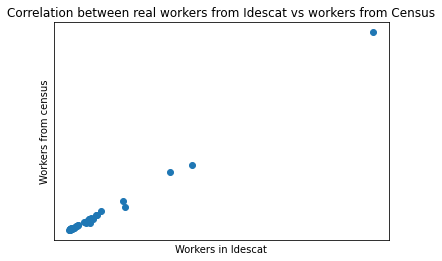

Total number of workers in census is 3034044
Total number of workers in Idescat is 2746104
Difference of workers in census vs Idescat is 279546
Correlation between workers census and idescat is 0.9955390095882761


In [91]:
comarques_abs = pd.read_csv('abs_comarques_definitiu.csv', sep=';')
comarques_abs = comarques_abs.merge(series, left_on ='Codi ABS', right_on= series.index)
comarques_absgp = comarques_abs.groupby(['Codi comarca','Nom comarca'])['WorkRegion'].sum().reset_index()
workers_comarca = pd.read_csv('t15292.csv', sep=',', decimal = '.', header = None)
workers_comarca = workers_comarca.rename(columns={0: "Comarca",1:'Codi comarca', 7:'Workers'})
workers_comarca = workers_comarca[['Comarca','Codi comarca', 'Workers']]
workers_comarca.Workers = workers_comarca.Workers.replace({'..': 0}).astype(int)
comarques_absgp = comarques_absgp.merge(workers_comarca, left_on = 'Codi comarca', right_on = 'Codi comarca')
plt.scatter(comarques_absgp['WorkRegion'], comarques_absgp['Workers'])
plt.xticks([])
plt.yticks([])
plt.xlabel('Workers in Idescat')
plt.ylabel('Workers from census')
plt.title('Correlation between real workers from Idescat vs workers from Census')
plt.show()
comarques_absgp[['WorkRegion','Workers']] = comarques_absgp[['WorkRegion','Workers']].replace({'..': 0})
comarques_absgp[['WorkRegion','Workers']] = comarques_absgp[['WorkRegion','Workers']].astype(int)
comarques_absgp['Diffworkers'] = comarques_absgp['WorkRegion'] - comarques_absgp['Workers']
# si diffowrkers + --> hem assignat més treballadors dels que hi han
# si diffworkers - --> hem assignat menys treballadors dels que hi han
print('Total number of workers in census is ' + str(series.sum()))
print('Total number of workers in Idescat is ' + str(workers_comarca.Workers.sum()))
print('Difference of workers in census vs Idescat is ' + str(comarques_absgp.WorkRegion.sum()-workers_comarca.Workers.sum()))
print('Correlation between workers census and idescat is ' + str(comarques_absgp['WorkRegion'].corr(comarques_absgp['Workers'])))

Correlation between Census and Idescat is 0.9955390095882761


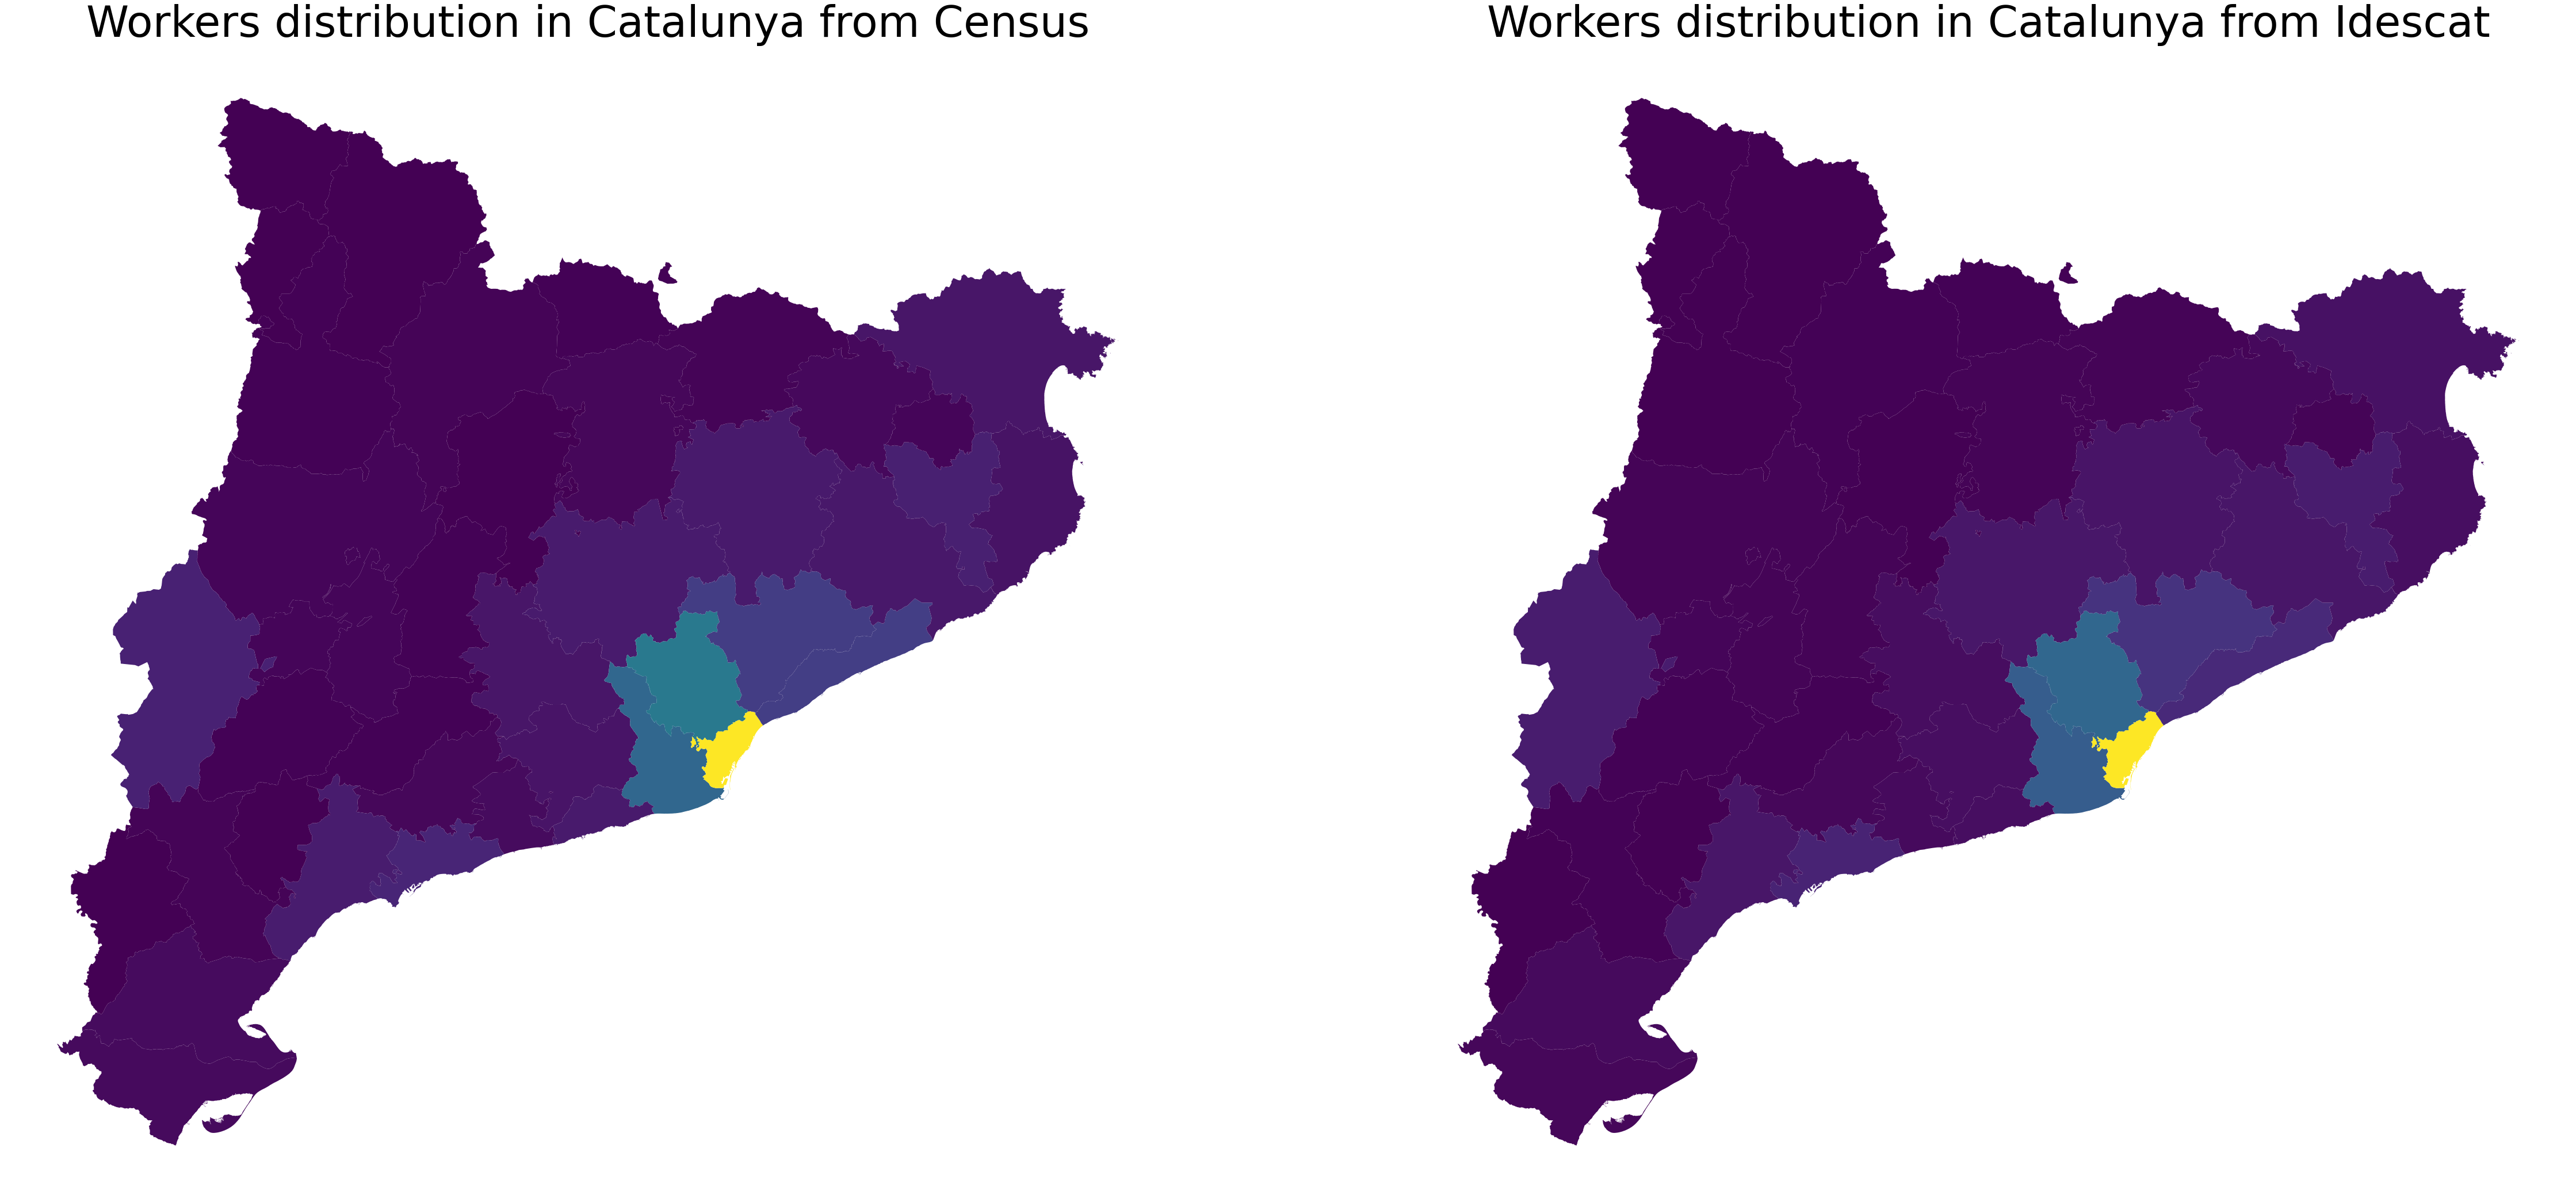

In [92]:
import geopandas as gpd
geodata = gpd.read_file('Comarques/shapefiles_catalunya_comarcas.shp')
geodata = geodata.sort_values('nom_comar').reset_index()
nums = np.arange(1, 42,1)
geodata['codicomarca'] = nums
geodata.codicomarca = geodata.codicomarca.astype(int)
comarques_absgp['Codi comarca'] = comarques_absgp['Codi comarca'].astype(int)
geodatacensus = geodata.merge(comarques_absgp[['Nom comarca','Workers', 'Codi comarca', 'WorkRegion']], left_on = 'codicomarca', right_on = 'Codi comarca')
geodatacensus
# fig, axes = plt.subplots(ncols=2)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(80, 64))
ax1 = geodatacensus.plot(ax=ax1, cmap = None,column='WorkRegion', legend=False)
ax2 = geodatacensus.plot(ax=ax2, cmap = None, column='Workers', legend=False)
ax1.set_title("Workers distribution in Catalunya from Census", fontsize = 75)
ax2.set_title("Workers distribution in Catalunya from Idescat", fontsize = 75)

ax1.set_axis_off()
ax2.set_axis_off()
print('Correlation between Census and Idescat is ' + str(geodatacensus['WorkRegion'].corr(geodatacensus['Workers'])))
# plt.title('Comparison of workers per comarca in Catalunya')

In [93]:
# filter315 = dfWorld5M.WorkRegion == '315'
# df315 = dfWorld5M[filter315]
# print(df315.shape[0])
# df315
# filterdist = df315.distancetowork5M == '[0.5,2]'
# df3152 = df315[filterdist]
# filterwork = df315.JobStatus == 1
# df315.individualABS.value_counts()
# df3152 = df315[filterwork]
# df3152.distancetowork5M.value_counts()

In [94]:
dfWorld5M.WorkRegion.nunique()

375

In [95]:
dfWorld5M = dfWorld5M.sort_index()
dfWorld5M

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
0         840190003   75       6       1087          6           -1   
1        1318467011   12       1       1087         -1            4   
2        1318467012   12       1       1087         -1            4   
3         729502001   61       6       1087          5           -1   
4        1318467010   12       1       1087         -1            4   
...             ...  ...     ...        ...        ...          ...   
7472972  1382340006   63       6          9          1            1   
7472973  1382340005   63       6          9          1            1   
7472974  1539904006   11       1          9         -1            4   
7472975  1539904005   11       1          9         -1            4   
7472976  1539948001   46       1          9          1            4   

         TimeToWork  HomeOccupancy  CNO  CNAE distancetowork5M  estudis5M  \
0                -1              2   -1    -1         no_viaja         -1   
1                 2              5   -1    -1         no_viaja         -1   
2                 2              5   -1    -1         no_viaja         -1   
3                -1              3   -1    -1         no_viaja         -1   
4                 2              5   -1    -1         no_viaja         -1   
...             ...            ...  ...   ...              ...        ...   
7472972          -1              2   12    91         no_viaja         -1   
7472973          -1              2   12    91         no_viaja         -1   
7472974           1              4   -1    -1         no_viaja         -1   
7472975           1              4   -1    -1         no_viaja         -1   
7472976           2              4   35    46         no_viaja         -1   

                randomprobabs individualABS                   name_abs  \
0          0.2649402468061939           209  SANT FELIU DE LLOBREGAT 1   
1         0.10035094419830315           209  SANT FELIU DE LLOBREGAT 1   
2        0.040465104016216724           209  SANT FELIU DE LLOBREGAT 1   
3          0.6151121968739162           213          SANT JOAN DESPÍ 1   
4         0.33923908127706415           209  SANT FELIU DE LLOBREGAT 1   
...                       ...           ...                        ...   
7472972   0.13610141637508577             9               RENYS DE MAR   
7472973    0.5236077510035774             9               RENYS DE MAR   
7472974    0.2541775208648309             9               RENYS DE MAR   
7472975    0.8516783833481384             9               RENYS DE MAR   
7472976    0.7863737052248514             9               RENYS DE MAR   

         randomProb WorkRegion SchoolRegion  
0          0.647962    Nowhere      Nowhere  
1          0.064967    Nowhere          209  
2          0.820357    Nowhere          209  
3          0.390792    Nowhere      Nowhere  
4          0.698871    Nowhere          209  
...             ...        ...          ...  
7472972    0.211789          9      Nowhere  
7472973    0.138918          9      Nowhere  
7472974    0.753498    Nowhere            9  
7472975    0.815746    Nowhere            9  
7472976    0.563669          9      Nowhere  

[7472977 rows x 18 columns]

#### Define in which economic sector each person works

In [96]:
### https://www.iberinform.es/noticias/detalle/sectores-economicos
### https://www.mites.gob.es/estadisticas/reg/reg11/ANE/cnae09.pdf
filterWork = dfWorld5M.JobStatus == 1
filternowork = dfWorld5M.JobStatus != 1

filterAGRICULTURA   = ((filterWork) & (dfWorld5M['CNAE'] == 1)) # Sector primari lletra A, valors del 01 al 05
filterPRIMARI   = ((filterWork) & ((dfWorld5M['CNAE'] > 1) & (dfWorld5M['CNAE'] < 5))) # Sector primari lletra A, valors del 01 al 05
filterSECTORSECUNDARI = ((filterWork) & ((dfWorld5M['CNAE'] >= 5) & (dfWorld5M['CNAE'] < 40)))# Sector secundari de la lletra B a la F, valors del 05 al 45
filterSECTORCONSTRUCCIO = ((filterWork) & ((dfWorld5M['CNAE'] >= 40) & (dfWorld5M['CNAE'] < 45)))# Sector secundari de la lletra B a la F, valors del 05 al 45
filterSECTORTERCIARI  = ((filterWork) & ((dfWorld5M['CNAE'] >= 45)&(dfWorld5M['CNAE'] != 85)&(dfWorld5M['CNAE'] != 86)))
filterEDUCACIÓ  = ((filterWork) & (dfWorld5M['CNAE'] == 85))
filterSANITARIS  = ((filterWork) & (dfWorld5M['CNAE'] == 86))
filternowork = (filternowork)
# Sector terciari de la lletra G a la T, valorSNSs del 45 al 99
# Sector terciari de la lletra G a la T, valorSNSs del 45 al 99
# falta sector construcio separat industria

In [97]:
# dfWorld5M.loc[filternowork, 'SECTORECONOMIC'] = 'No work'
# dfWorld5M.loc[filterAGRICULTURA, 'SECTORECONOMIC'] = 'SectorPrimari'
# # dfWorld5M.loc[filterPRIMARI, 'SECTORECONOMIC'] = 'SectorPrimari' 
# dfWorld5M.loc[filterPRIMARI, 'SECTORECONOMIC'] = 'SectorPrimari' 
# dfWorld5M.loc[filterSECTORSECUNDARI, 'SECTORECONOMIC'] = 'SectorSecundari' 
# dfWorld5M.loc[filterSECTORCONSTRUCCIO, 'SECTORECONOMIC'] = 'SectorConstrucció' 
# dfWorld5M.loc[filterSECTORTERCIARI, 'SECTORECONOMIC'] = 'SectorTerciari' 
# dfWorld5M.loc[filterEDUCACIÓ, 'SECTORECONOMIC'] = 'Educació' 
# dfWorld5M.loc[filterSANITARIS, 'SECTORECONOMIC'] = 'Sanitaris/Residencia' 
dfWorld5M.loc[filternowork, 'SECTORECONOMIC'] = 'No work'
dfWorld5M.loc[filterAGRICULTURA, 'SECTORECONOMIC'] = 'SectorPrimari'
# dfWorld5M.loc[filterPRIMARI, 'SECTORECONOMIC'] = 'SectorPrimari' 
dfWorld5M.loc[filterPRIMARI, 'SECTORECONOMIC'] = 'SectorPrimari' 
dfWorld5M.loc[filterSECTORSECUNDARI, 'SECTORECONOMIC'] = 'Industria' 
dfWorld5M.loc[filterSECTORCONSTRUCCIO, 'SECTORECONOMIC'] = 'Construccio' 
dfWorld5M.loc[filterSECTORTERCIARI, 'SECTORECONOMIC'] = 'Serveis' 
dfWorld5M.loc[filterEDUCACIÓ, 'SECTORECONOMIC'] = 'Educació' 
dfWorld5M.loc[filterSANITARIS, 'SECTORECONOMIC'] = 'Sanitaris'
# falta sector construcio separat industria

In [98]:
dfWorld5M['SECTORECONOMIC'].value_counts()

No work          4438933
Serveis          1793664
Industria         527148
Educació          244391
Construccio       214301
Sanitaris         191570
SectorPrimari      62970
Name: SECTORECONOMIC, dtype: int64

In [99]:
filterWork = dfWorld5M['JobStatus'] == 1
noworkers = dfWorld5M[~filterWork]
print(noworkers.shape[0])
# workers.SECTORECONOMIC.value_counts()

4438933


In [100]:
print('Sum of working people in sector EDUCACIÓ ' +str(np.sum(filterEDUCACIÓ)))
print('Sum of working people in sector SANITARIS ' +str(np.sum(filterSANITARIS)))
print('Sum of working people in sector AGRICULTURA ' +str(np.sum(filterAGRICULTURA)+np.sum(filterPRIMARI)))
# print('Sum of working people in sector PRIMARI ' +str(np.sum(filterPRIMARI)))
print('Sum of working people in sector SECTORSECUNDARI ' +str(np.sum(filterSECTORSECUNDARI)))
print('Sum of working people in sector SECTORTERCIARI ' +str(np.sum(filterSECTORTERCIARI)))
print('Sum of working people in sector SECTORCONSTRUCCIO ' +str(np.sum(filterSECTORCONSTRUCCIO)))

Sum of working people in sector EDUCACIÓ 244391
Sum of working people in sector SANITARIS 191570
Sum of working people in sector AGRICULTURA 62970
Sum of working people in sector SECTORSECUNDARI 527148
Sum of working people in sector SECTORTERCIARI 1793664
Sum of working people in sector SECTORCONSTRUCCIO 214301


In [101]:
hospitals = pd.read_csv('final_hospitals_vf2.csv',sep=',')
hospitals['ABS'] = hospitals['ABS'].astype('str').str.zfill(3)
hospitals = hospitals.sort_values(by=['ABS'])
hospitals.dtypes
hospitals

Hospital                    Població  ABS llits  \
250       H. Comarcal Amposta                      Amposta  004    88   
4          Espitau Val d’Aran                         Aran  007    31   
118            Hospital Privat               Arenys de Mar  009    61   
245            Hospital Privat             Artesa de Segre  012    70   
172     Hospital del Vendrell                  El Vendrell  013  120    
..                         ...                         ...  ...   ...   
113  H. Residència Sant Camil             Ribes - Olivella  393   171   
6              Hospital Privat  Vilafranca del Penedès - 2  398    79   
7              Hospital Privat  Vilafranca del Penedès - 2  398    79   
5              Hospital Privat  Vilafranca del Penedès - 2  398    79   
8     H. Comarcal de l’Alt P.   Vilafranca del Penedès - 2  398   144   

     Sanitaris  
250        145  
4           51  
118        101  
245        116  
172        198  
..         ...  
113        282  
6          130  
7          130  
5          130  
8          238  

[252 rows x 5 columns]

In [102]:
dfWorld5M.WorkRegion = dfWorld5M.WorkRegion.astype(str).str.zfill(3)
uniqueworkingabs = dfWorld5M.WorkRegion.unique()
uniqueworkingabs, len(uniqueworkingabs)
uniqueworkingabs = sorted(uniqueworkingabs, reverse = False)
len(uniqueworkingabs)

375

### Send kids to school

In [103]:
dfWorld5M['individualABS'] = dfWorld5M['individualABS'].astype(int)
dfWorld5M = dfWorld5M.sort_values(by='individualABS')
dfWorld5M['individualABS'] = dfWorld5M['individualABS'].astype(str).str.zfill(3)
absList = sorted(dfWorld5M['individualABS'].unique())
absList = sorted(absList)
filterSchool = (dfWorld5M['Age'] <= 18) & (dfWorld5M['JobStatus'] != 1) & (dfWorld5M['JobLocation'] != 1)
if cells_to_run == 'ALL':
    schoolersABS5M = dfWorld5M['individualABS'].where(filterSchool).value_counts()[absList]
    print('The schoolers crew is', schoolersABS5M.sum(), 'kids')
else: pass

The schoolers crew is 1308604 kids


In [104]:
dfWorld5M.SchoolRegion = dfWorld5M.SchoolRegion.astype(str).str.zfill(3)
schoolabs = dfWorld5M.SchoolRegion.unique()
schoolabs = sorted(schoolabs, reverse = False)
len(schoolabs)

375

In [105]:
assert numPeople5M == len(dfWorld5M)

In [106]:
absList

['001',
 '002',
 '003',
 '004',
 '005',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '059',
 '062',
 '063',
 '064',
 '065',
 '067',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '095',
 '096',
 '097',
 '098',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '133',
 '134',
 '135',
 '136',
 '137',


In [107]:
schoolABS5M = dfWorld5M.SchoolRegion.to_numpy()
peoplePerABS = dfWorld5M['individualABS'].value_counts()[absList]

if cells_to_run == 'ALL':    
    occurrences = np.count_nonzero(schoolABS5M == 'Nowhere')
    print(occurrences, 'people do not go to school\n')
    nABS = len(absList)
    schoolPlaces = np.zeros(nABS, dtype = int)

    for jp, ABS in enumerate(absList):  
        schoolPlaces[jp] = np.count_nonzero(schoolABS5M == ABS)  
        print('In', ABS, 'live', peoplePerABS[ABS], 'of which', schoolersABS5M[ABS],'go to school, and there are', \
               schoolPlaces[jp], 'school places')

    print('\n The number of scholars is',schoolersABS5M.sum(), 'and the number of school places', schoolPlaces.sum())
else: pass

6164373 people do not go to school

In 001 live 6242 of which 1110 go to school, and there are 1110 school places
In 002 live 12147 of which 1893 go to school, and there are 1893 school places
In 003 live 10491 of which 1692 go to school, and there are 1692 school places
In 004 live 28030 of which 5091 go to school, and there are 5091 school places
In 005 live 12202 of which 2107 go to school, and there are 2107 school places
In 007 live 9677 of which 1320 go to school, and there are 1320 school places
In 008 live 10301 of which 1773 go to school, and there are 1773 school places
In 009 live 22924 of which 4052 go to school, and there are 4052 school places
In 010 live 17370 of which 3667 go to school, and there are 3667 school places
In 011 live 11054 of which 1852 go to school, and there are 1852 school places
In 012 live 5421 of which 866 go to school, and there are 866 school places
In 013 live 47503 of which 9262 go to school, and there are 9262 school places
In 014 live 28511 of 

In [108]:
# Classrooms' size depends on age
size0 =     7  
size1 =    12   
size2 =    16
sizeKind = 22
sizeElem = 25
sizeRest = 28

# Start schools ID at 1000001, so that schools and companies do not get mixed up 
schoolID = np.zeros(numPeople5M, dtype = int)
absSchoolID = np.zeros(numPeople5M, dtype = int)

iSchool = 1000001 

for iRegion, ABS in enumerate(absList):    
        
    # Get IDs of students of this region and randomize ordering  
    filterABS = ( filterSchool & (dfWorld5M['SchoolRegion'] == ABS) )
    filter = ( filterSchool & (dfWorld5M['SchoolRegion'] == ABS) )
    kidsID = np.where(filterABS)[0]

    kidsAge = dfWorld5M['Age'].where(filter).dropna().to_numpy(dtype = int)
    
    data = {'ID': kidsID, 'Age': kidsAge}
    schoolDf = pd.DataFrame(data)
    schoolDf = schoolDf.sample(frac = 1, random_state = 1)  # shuffle
    schoolDf = schoolDf.sort_values('Age')   # sort by age

    studentsID = schoolDf['ID'].to_numpy(dtype = int)
    
    # Create array with size of classrooms depending on age (remember that studentsID is ordered by age)
    filter0 = (dfWorld5M['Age'] == 0) & (dfWorld5M['SchoolRegion'] == ABS) & (dfWorld5M['JobLocation'] != 1)     
    filter1 = (dfWorld5M['Age'] == 1) & (dfWorld5M['SchoolRegion'] == ABS) & (dfWorld5M['JobLocation'] != 1)     
    filter2 = (dfWorld5M['Age'] == 2) & (dfWorld5M['SchoolRegion'] == ABS) & (dfWorld5M['JobLocation'] != 1)     
    filterKind = (dfWorld5M['Age'] >= 3)  & (dfWorld5M['Age'] <=5) & (dfWorld5M['SchoolRegion'] == ABS) & \
        (dfWorld5M['JobLocation'] != 1)    
    filterElem = (dfWorld5M['Age'] >= 6)  & (dfWorld5M['Age'] <=11) & (dfWorld5M['SchoolRegion'] == ABS) & \
        (dfWorld5M['JobLocation'] != 1)
    filterRest = (dfWorld5M['Age'] >= 12) & (dfWorld5M['Age'] <=18) & (dfWorld5M['SchoolRegion'] == ABS) & \
        (dfWorld5M['JobStatus'] != 1) & (dfWorld5M['JobLocation'] != 1)   
    
    kids0    = np.ones( int(len(dfWorld5M[filter0]) / size0), dtype = int) * size0
    kids1    = np.ones( int(len(dfWorld5M[filter1]) / size1), dtype = int) * size1
    kids2    = np.ones( int(len(dfWorld5M[filter2]) / size2), dtype = int) * size2
    kidsKind = np.ones( int(len(dfWorld5M[filterKind]) / sizeKind), dtype = int) * sizeKind
    kidsElem = np.ones( int(len(dfWorld5M[filterElem]) / sizeElem), dtype = int) * sizeElem
    kidsRes  = np.ones( int(len(dfWorld5M[filterRest]) / sizeRest) + 4, dtype = int) * sizeRest  
    # Added four more classrooms to kidsRes to compensate the previous truncations  
    
    schoolSize = kids0
    schoolSize = np.append(schoolSize, kids1)
    schoolSize = np.append(schoolSize, kids2)
    schoolSize = np.append(schoolSize, kidsKind)
    schoolSize = np.append(schoolSize, kidsElem)
    schoolSize = np.append(schoolSize, kidsRes) 
        
    
    cumSchools = np.cumsum(schoolSize)
    trunc = np.argmax(cumSchools > len(studentsID)) # Get the array position with more school seats than needed
         
    schoolSizeTrunc =  schoolSize[:trunc]    
    schoolSizeTrunc = np.append(schoolSizeTrunc, len(studentsID) - sum(schoolSizeTrunc)) # Exact array of classroom 
        
#    print('sum of schoolsizes is', sum(schoolSizeTrunc))    
    
    schoolID[studentsID] =  np.repeat(np.arange(iSchool, iSchool + len(schoolSizeTrunc)), schoolSizeTrunc)
    absSchoolID[studentsID] =  ABS

    iSchool = iSchool + len(schoolSizeTrunc)
    if cells_to_run == 'ALL':
        print(ABS, iSchool)
    else: pass

dfWorld5M['schoolID'] = schoolID    

001 1000056
002 1000146
003 1000227
004 1000480
005 1000587
007 1000655
008 1000741
009 1000942
010 1001116
011 1001208
012 1001250
013 1001709
014 1001939
015 1002228
016 1002298
017 1002448
018 1002535
019 1002734
020 1002855
021 1003045
022 1003244
023 1003419
024 1003530
025 1003710
027 1003848
028 1004014
029 1004158
030 1004307
031 1004460
032 1004594
033 1004736
034 1004855
035 1005075
036 1005215
038 1005354
039 1005542
040 1005709
041 1005883
042 1006116
043 1006372
044 1006619
045 1006770
046 1007114
047 1007289
048 1007445
049 1007555
050 1007702
051 1007868
052 1007996
053 1008127
054 1008312
055 1008531
056 1008676
059 1008853
062 1009028
063 1009162
064 1009280
065 1009510
067 1009740
069 1009847
070 1009915
071 1010233
072 1010521
073 1010704
074 1010873
075 1010989
076 1011130
077 1011320
078 1011444
079 1011529
080 1011564
081 1011627
082 1011782
083 1011836
084 1011986
085 1012321
086 1012439
087 1012501
088 1012559
089 1012776
090 1012937
091 1013252
092 1013284
093 

In [109]:
schoolID, absSchoolID

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

### Send students to universities

In [110]:
filtergrau = ((dfWorld5M.estudis5M == 8) | (dfWorld5M.estudis5M == 9) | (dfWorld5M.estudis5M == 10))& (dfWorld5M['JobStatus'] != 1) & (dfWorld5M['JobLocation'] != 1)
filtermaster = (dfWorld5M.estudis5M == 11) & (dfWorld5M['JobStatus'] != 1) & (dfWorld5M['JobLocation'] != 1)
filterdoctorado = (dfWorld5M.estudis5M == 12) & (dfWorld5M['JobStatus'] != 1) & (dfWorld5M['JobLocation'] != 1)

dfgrau = dfWorld5M[filtergrau]
dfmaster = dfWorld5M[filtermaster]
dfdoctorado = dfWorld5M[filterdoctorado]

In [111]:
print('There are ' +str(len(dfgrau)) + ' people studying grau')
print('There are ' +str(len(dfmaster)) + ' people studying master')
print('There are ' +str(len(dfdoctorado)) + ' people studying doctorado')

There are 122695 people studying grau
There are 15225 people studying master
There are 3372 people studying doctorado


In [112]:
graumasterdiplicdoc = pd.concat([dfgrau,dfmaster,dfdoctorado], axis=0)
print('There are ' +str(len(graumasterdiplicdoc)) + ' people studying grau or master')
# graumasterdiplicdoc.Age.plot(kind='barh')

There are 141292 people studying grau or master


In [113]:
dfestudis = pd.read_csv('estudiants.csv', sep=',')
dfestudis = dfestudis.rename(columns={'Unnamed: 0':'Comarca'})
print('original idescat nº of students ', dfestudis['Alumnes residents (2)'].sum())
dfestudis['Alumnes residents (2)'].sum(), dfestudis['Llocs destudi localitzats (1)'].sum()
dfestudis['% alumnes'] = dfestudis['Alumnes residents (2)']/dfestudis['Alumnes residents (2)'].sum()
dfestudis['valor cens'] = round(dfestudis['% alumnes'] * len(graumasterdiplicdoc),0).astype(int)
print('normalized nº of students in idescat ', dfestudis['valor cens'].sum())
print('nº of students in census ', len(graumasterdiplicdoc))
toadd = (len(graumasterdiplicdoc)-dfestudis['valor cens'].sum()).astype(int)
print('we need to add ' + str(toadd) + ' students')
dfestudis['valor cens'] = np.where(dfestudis['Comarca']== 'Barcelonès', dfestudis['valor cens'].astype(int)+int(toadd), dfestudis['valor cens'])
print('we add them in the largest uni in catalunya')
print('Adding students ...')
print('Students added')
print('normalized nº of students in idescat after adding students ', dfestudis['valor cens'].sum())
print('nº of students in census after adding students ', len(graumasterdiplicdoc))

original idescat nº of students  157735
normalized nº of students in idescat  141290
nº of students in census  141292
we need to add 2 students
we add them in the largest uni in catalunya
Adding students ...
Students added
normalized nº of students in idescat after adding students  141292
nº of students in census after adding students  141292


In [114]:
unis = pd.read_csv('universitats.csv', sep=';')
unis = unis.iloc[2:]
unis = unis.rename(columns={"Unnamed: 0": "Universitat"}).reset_index()
comarques = ['Barcelonès', 'Vallès Occidental', 'Barcelonès', 'Barcelonès', 'Gironès', 'Segrià\xa0',\
            'Tarragonès', 'Barcelonès', 'Barcelonès', 'Osona', 'Barcelonès', 'Barcelonès', 'Barcelonès']
unis['Comarca'] = comarques
unis = unis[unis['Universitat'].str.contains('Sistema universitari privat')==False]
unis = unis[unis['Universitat'].str.contains('Universitat Oberta de Catalunya')==False]
unis

index                                        Universitat  Homes  Dones  \
0       2                           Universitat de Barcelona  19449  31333   
1       3                  Universitat Autònoma de Barcelona  14078  21155   
2       4               Universitat Politècnica de Catalunya  21978   7736   
3       5                           Universitat Pompeu Fabra   4531   6281   
4       6                              Universitat de Girona   5607   7014   
5       7                              Universitat de Lleida   3950   4739   
6       8                       Universitat Rovira i Virgili   4937   6882   
8      10                            Universitat Ramon Llull   6280   7267   
9      11  Universitat de Vic-Universitat Central de Cata...   2227   3571   
10     12             Universitat Internacional de Catalunya   1186   2165   
11     13                         Universitat Abat Oliba CEU    559    618   

    Total            Comarca  
0   50782         Barcelonès  
1   35233  Vallès Occidental  
2   29714         Barcelonès  
3   10812         Barcelonès  
4   12621            Gironès  
5    8689            Segrià   
6   11819         Tarragonès  
8   13547         Barcelonès  
9    5798              Osona  
10   3351         Barcelonès  
11   1177         Barcelonès

In [115]:
alumnes = unis.Total.sum()
unis['% alumnes'] = unis.Total / alumnes
newalumnes =  len(graumasterdiplicdoc)
unis['normalised_students'] = round(unis['% alumnes'] * newalumnes).astype(int)
unis

index                                        Universitat  Homes  Dones  \
0       2                           Universitat de Barcelona  19449  31333   
1       3                  Universitat Autònoma de Barcelona  14078  21155   
2       4               Universitat Politècnica de Catalunya  21978   7736   
3       5                           Universitat Pompeu Fabra   4531   6281   
4       6                              Universitat de Girona   5607   7014   
5       7                              Universitat de Lleida   3950   4739   
6       8                       Universitat Rovira i Virgili   4937   6882   
8      10                            Universitat Ramon Llull   6280   7267   
9      11  Universitat de Vic-Universitat Central de Cata...   2227   3571   
10     12             Universitat Internacional de Catalunya   1186   2165   
11     13                         Universitat Abat Oliba CEU    559    618   

    Total            Comarca  % alumnes  normalised_students  
0   50782         Barcelonès   0.276676                39092  
1   35233  Vallès Occidental   0.191960                27122  
2   29714         Barcelonès   0.161891                22874  
3   10812         Barcelonès   0.058907                 8323  
4   12621            Gironès   0.068763                 9716  
5    8689            Segrià    0.047340                 6689  
6   11819         Tarragonès   0.064394                 9098  
8   13547         Barcelonès   0.073808                10429  
9    5798              Osona   0.031589                 4463  
10   3351         Barcelonès   0.018257                 2580  
11   1177         Barcelonès   0.006413                  906

In [116]:
ub = unis.loc[unis["Universitat"] == "Universitat de Barcelona"]

ub1 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat de Barcelona Campus 1',
     "Homes": (ub["Homes"]).astype(int) / 4,
     "Dones": (ub["Dones"]).astype(int) / 4,
     "Total": (ub["Total"]).astype(int) / 4,
     "% alumnes": (ub["% alumnes"]).astype(int) / 4,
     "normalised_students": (ub["normalised_students"]).astype(int) / 4,
     "Comarca":  'Barcelonès',
      })

ub2 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat de Barcelona Campus 2',
     "Homes": (ub["Homes"]).astype(int) / 4,
     "Dones": (ub["Dones"]).astype(int) / 4,
     "Total": (ub["Total"]).astype(int) / 4,
     "% alumnes": (ub["% alumnes"]).astype(int) / 4,
     "normalised_students": (ub["normalised_students"]).astype(int) / 4,
     "Comarca":  'Barcelonès',
      })

ub3 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat de Barcelona Campus 3',
     "Homes": (ub["Homes"]).astype(int) / 4,
     "Dones": (ub["Dones"]).astype(int) / 4,
     "Total": (ub["Total"]).astype(int) / 4,
     "% alumnes": (ub["% alumnes"]).astype(int) / 4,
     "normalised_students": (ub["normalised_students"]).astype(int) / 4,
     "Comarca":  'Barcelonès',
      })

ub4 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat de Barcelona Campus 4',
     "Homes": (ub["Homes"]).astype(int) / 4,
     "Dones": (ub["Dones"]).astype(int) / 4,
     "Total": (ub["Total"]).astype(int) / 4,
     "% alumnes": (ub["% alumnes"]).astype(int) / 4,
     "normalised_students": (ub["normalised_students"]).astype(int) / 4,
     "Comarca":  'Barcelonès',
      })

unis = pd.concat([unis, ub1, ub2, ub3], ignore_index=True)

uab = unis.loc[unis["Universitat"] == "Universitat Autònoma de Barcelona"]

uab1 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat Autònoma de Barcelona Campus 1',
     "Homes": (uab["Homes"]).astype(int) / 3,
     "Dones": (uab["Dones"]).astype(int) / 3,
     "Total": (uab["Total"]).astype(int) / 3,
     "% alumnes": (uab["% alumnes"]).astype(int) / 3,
     "normalised_students": (uab["normalised_students"]).astype(int) / 3,
     "Comarca":  'Vallès Occidental',
      })

uab2 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat Autònoma de Barcelona Campus 2',
     "Homes": (uab["Homes"]).astype(int) / 3,
     "Dones": (uab["Dones"]).astype(int) / 3,
     "Total": (uab["Total"]).astype(int) / 3,
     "% alumnes": (uab["% alumnes"]).astype(int) / 3,
     "normalised_students": (uab["normalised_students"]).astype(int) / 3,
     "Comarca":  'Vallès Occidental',
      })

uab3 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat Autònoma de Barcelona Campus 3',
     "Homes": (uab["Homes"]).astype(int) / 3,
     "Dones": (uab["Dones"]).astype(int) / 3,
     "Total": (uab["Total"]).astype(int) / 3,
     "% alumnes": (uab["% alumnes"]).astype(int) / 3,
     "normalised_students": (uab["normalised_students"]).astype(int) / 3,
     "Comarca":  'Vallès Occidental',
      })

unis = pd.concat([unis, uab1, uab2], ignore_index=True)

upc = unis.loc[unis["Universitat"] == "Universitat Politècnica de Catalunya"]

upc1 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat Politècnica de Catalunya Campus 1',
     "Homes": (upc["Homes"]).astype(int) / 3,
     "Dones": (upc["Dones"]).astype(int) / 3,
     "Total": (upc["Total"]).astype(int) / 3,
     "% alumnes": (upc["% alumnes"]).astype(int) / 3,
     "normalised_students": (upc["normalised_students"]).astype(int) / 3,
     "Comarca":  'Barcelonès',
      })

upc2 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat Politècnica de Catalunya Campus 2',
     "Homes": (upc["Homes"]).astype(int) / 3,
     "Dones": (upc["Dones"]).astype(int) / 3,
     "Total": (upc["Total"]).astype(int) / 3,
     "% alumnes": (upc["% alumnes"]).astype(int) / 3,
     "normalised_students": (upc["normalised_students"]).astype(int) / 3,
     "Comarca":  'Barcelonès',
      })

upc3 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat Politècnica de Catalunya Campus 3',
     "Homes": (upc["Homes"]).astype(int) / 3,
     "Dones": (upc["Dones"]).astype(int) / 3,
     "Total": (upc["Total"]).astype(int) / 3,
     "% alumnes": (upc["% alumnes"]).astype(int) / 3,
     "normalised_students": (upc["normalised_students"]).astype(int) / 3,
     "Comarca":  'Barcelonès',
      })

unis = pd.concat([unis, upc1, upc2, upc3], ignore_index=True)

uRL = unis.loc[unis["Universitat"] == "Universitat Ramon Llull"]

uRL1 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat Ramon Llull Campus 1',
     "Homes": (uRL["Homes"]).astype(int) / 2,
     "Dones": (uRL["Dones"]).astype(int) / 2,
     "Total": (uRL["Total"]).astype(int) / 2,
     "% alumnes": (uRL["% alumnes"]).astype(int) / 2,
     "normalised_students": (uRL["normalised_students"]).astype(int) / 2,
     "Comarca":  'Barcelonès',
      })

uRL2 = pd.DataFrame.from_dict({
     "Universitat": 'Universitat Ramon Llull Campus 2',
     "Homes": (uRL["Homes"]).astype(int) / 2,
     "Dones": (uRL["Dones"]).astype(int) / 2,
     "Total": (uRL["Total"]).astype(int) / 2,
     "% alumnes": (uRL["% alumnes"]).astype(int) / 2,
     "normalised_students": (uRL["normalised_students"]).astype(int) / 2,
     "Comarca":  'Barcelonès',
      })

unis = pd.concat([unis, uRL1, uRL2], ignore_index=True)

ub.index
uab.index
upc.index
uRL.index
print(ub.index), print(uab.index), print(upc.index), print(uRL.index)
unis = unis.drop([0,1,2,7]).reset_index()
unis[['Homes', 'Dones', 'Total']] = unis[['Homes', 'Dones', 'Total']].astype(int)
unis = unis.iloc[:,2:]
unis

Int64Index([0], dtype='int64')
Int64Index([1], dtype='int64')
Int64Index([2], dtype='int64')
Int64Index([7], dtype='int64')


Universitat  Homes  Dones  Total  \
0                            Universitat Pompeu Fabra   4531   6281  10812   
1                               Universitat de Girona   5607   7014  12621   
2                               Universitat de Lleida   3950   4739   8689   
3                        Universitat Rovira i Virgili   4937   6882  11819   
4   Universitat de Vic-Universitat Central de Cata...   2227   3571   5798   
5              Universitat Internacional de Catalunya   1186   2165   3351   
6                          Universitat Abat Oliba CEU    559    618   1177   
7                   Universitat de Barcelona Campus 1   4862   7833  12695   
8                   Universitat de Barcelona Campus 2   4862   7833  12695   
9                   Universitat de Barcelona Campus 3   4862   7833  12695   
10         Universitat Autònoma de Barcelona Campus 1   4692   7051  11744   
11         Universitat Autònoma de Barcelona Campus 2   4692   7051  11744   
12      Universitat Politècnica de Catalunya Campus 1   7326   2578   9904   
13      Universitat Politècnica de Catalunya Campus 2   7326   2578   9904   
14      Universitat Politècnica de Catalunya Campus 3   7326   2578   9904   
15                   Universitat Ramon Llull Campus 1   3140   3633   6773   
16                   Universitat Ramon Llull Campus 2   3140   3633   6773   

              Comarca  % alumnes  normalised_students  
0          Barcelonès   0.058907          8323.000000  
1             Gironès   0.068763          9716.000000  
2             Segrià    0.047340          6689.000000  
3          Tarragonès   0.064394          9098.000000  
4               Osona   0.031589          4463.000000  
5          Barcelonès   0.018257          2580.000000  
6          Barcelonès   0.006413           906.000000  
7          Barcelonès   0.000000          9773.000000  
8          Barcelonès   0.000000          9773.000000  
9          Barcelonès   0.000000          9773.000000  
10  Vallès Occidental   0.000000          9040.666667  
11  Vallès Occidental   0.000000          9040.666667  
12         Barcelonès   0.000000          7624.666667  
13         Barcelonès   0.000000          7624.666667  
14         Barcelonès   0.000000          7624.666667  
15         Barcelonès   0.000000          5214.500000  
16         Barcelonès   0.000000          5214.500000

In [117]:
alumnes = unis.Total.sum()
unis['% alumnes'] = unis.Total / alumnes
newalumnes =  len(graumasterdiplicdoc)
unis['normalised_students'] = round(unis['% alumnes'] * newalumnes).astype(int)
unis

Universitat  Homes  Dones  Total  \
0                            Universitat Pompeu Fabra   4531   6281  10812   
1                               Universitat de Girona   5607   7014  12621   
2                               Universitat de Lleida   3950   4739   8689   
3                        Universitat Rovira i Virgili   4937   6882  11819   
4   Universitat de Vic-Universitat Central de Cata...   2227   3571   5798   
5              Universitat Internacional de Catalunya   1186   2165   3351   
6                          Universitat Abat Oliba CEU    559    618   1177   
7                   Universitat de Barcelona Campus 1   4862   7833  12695   
8                   Universitat de Barcelona Campus 2   4862   7833  12695   
9                   Universitat de Barcelona Campus 3   4862   7833  12695   
10         Universitat Autònoma de Barcelona Campus 1   4692   7051  11744   
11         Universitat Autònoma de Barcelona Campus 2   4692   7051  11744   
12      Universitat Politècnica de Catalunya Campus 1   7326   2578   9904   
13      Universitat Politècnica de Catalunya Campus 2   7326   2578   9904   
14      Universitat Politècnica de Catalunya Campus 3   7326   2578   9904   
15                   Universitat Ramon Llull Campus 1   3140   3633   6773   
16                   Universitat Ramon Llull Campus 2   3140   3633   6773   

              Comarca  % alumnes  normalised_students  
0          Barcelonès   0.067958                 9602  
1             Gironès   0.079328                11208  
2             Segrià    0.054614                 7717  
3          Tarragonès   0.074288                10496  
4               Osona   0.036443                 5149  
5          Barcelonès   0.021062                 2976  
6          Barcelonès   0.007398                 1045  
7          Barcelonès   0.079794                11274  
8          Barcelonès   0.079794                11274  
9          Barcelonès   0.079794                11274  
10  Vallès Occidental   0.073816                10430  
11  Vallès Occidental   0.073816                10430  
12         Barcelonès   0.062251                 8796  
13         Barcelonès   0.062251                 8796  
14         Barcelonès   0.062251                 8796  
15         Barcelonès   0.042571                 6015  
16         Barcelonès   0.042571                 6015

In [118]:
unis.normalised_students.sum()

141293

In [119]:
print('nº of students in census after adding students ', len(graumasterdiplicdoc))
print('nº of students in universities according to idescat ', unis.normalised_students.sum())

nº of students in census after adding students  141292
nº of students in universities according to idescat  141293


In [120]:
comarques_abs = pd.read_csv('abs_comarques_definitiu.csv', sep=';')
dictcomarquesabs = comarques_abs.groupby(['Nom comarca'])['Codi ABS'].apply(list).to_dict()

In [121]:
toadd = (len(graumasterdiplicdoc)-unis.normalised_students.sum()).astype(int)
print('Difference of students in census and idescat universities is ' +str(toadd))
unis['normalised_students'] = np.where(unis['Universitat']== 'Universitat Oberta de Catalunya', unis['normalised_students'].astype(int)+int(toadd), unis['normalised_students'])
print('nº of students in census after adding students ', len(graumasterdiplicdoc))
print('nº of students in universities according to idescat ', unis.normalised_students.sum())

Difference of students in census and idescat universities is -1
nº of students in census after adding students  141292
nº of students in universities according to idescat  141293


In [122]:
np.random.seed(1)
unis['random_abs'] = unis["Comarca"].map(dictcomarquesabs)
unis
# unis = unis.fillna('Online')
# # # summaryinfo_['date'] = summaryinfo_['diagnosedTic'].apply(lambda x: tictotime(x))
np.random.seed(1)
for i in range(len(unis)):
    np.random.seed(i)
    r = np.random.choice(unis.iloc[i,-1], 1)
    np.random.seed(i)
    unis.iloc[i,-1] = r
unis
# unis['cumsum'] = unis['% alumnes'].cumsum()
# print(unis)
# len(unis) 292

Universitat  Homes  Dones  Total  \
0                            Universitat Pompeu Fabra   4531   6281  10812   
1                               Universitat de Girona   5607   7014  12621   
2                               Universitat de Lleida   3950   4739   8689   
3                        Universitat Rovira i Virgili   4937   6882  11819   
4   Universitat de Vic-Universitat Central de Cata...   2227   3571   5798   
5              Universitat Internacional de Catalunya   1186   2165   3351   
6                          Universitat Abat Oliba CEU    559    618   1177   
7                   Universitat de Barcelona Campus 1   4862   7833  12695   
8                   Universitat de Barcelona Campus 2   4862   7833  12695   
9                   Universitat de Barcelona Campus 3   4862   7833  12695   
10         Universitat Autònoma de Barcelona Campus 1   4692   7051  11744   
11         Universitat Autònoma de Barcelona Campus 2   4692   7051  11744   
12      Universitat Politècnica de Catalunya Campus 1   7326   2578   9904   
13      Universitat Politècnica de Catalunya Campus 2   7326   2578   9904   
14      Universitat Politècnica de Catalunya Campus 3   7326   2578   9904   
15                   Universitat Ramon Llull Campus 1   3140   3633   6773   
16                   Universitat Ramon Llull Campus 2   3140   3633   6773   

              Comarca  % alumnes  normalised_students random_abs  
0          Barcelonès   0.067958                 9602         42  
1             Gironès   0.079328                11208        126  
2             Segrià    0.054614                 7717        232  
3          Tarragonès   0.074288                10496        242  
4               Osona   0.036443                 5149        144  
5          Barcelonès   0.021062                 2976        299  
6          Barcelonès   0.007398                 1045        342  
7          Barcelonès   0.079794                11274        358  
8          Barcelonès   0.079794                11274         69  
9          Barcelonès   0.079794                11274        293  
10  Vallès Occidental   0.073816                10430        386  
11  Vallès Occidental   0.073816                10430        344  
12         Barcelonès   0.062251                 8796         71  
13         Barcelonès   0.062251                 8796        222  
14         Barcelonès   0.062251                 8796        288  
15         Barcelonès   0.042571                 6015         75  
16         Barcelonès   0.042571                 6015         45

In [123]:
unisgp = unis.groupby(['Comarca']).sum().reset_index()
unisgp

Comarca  Homes  Dones  Total  % alumnes  normalised_students
0         Barcelonès  49120  47563  96683   0.607695                85863
1            Gironès   5607   7014  12621   0.079328                11208
2              Osona   2227   3571   5798   0.036443                 5149
3            Segrià    3950   4739   8689   0.054614                 7717
4         Tarragonès   4937   6882  11819   0.074288                10496
5  Vallès Occidental   9384  14102  23488   0.147632                20860

In [124]:
unis

Universitat  Homes  Dones  Total  \
0                            Universitat Pompeu Fabra   4531   6281  10812   
1                               Universitat de Girona   5607   7014  12621   
2                               Universitat de Lleida   3950   4739   8689   
3                        Universitat Rovira i Virgili   4937   6882  11819   
4   Universitat de Vic-Universitat Central de Cata...   2227   3571   5798   
5              Universitat Internacional de Catalunya   1186   2165   3351   
6                          Universitat Abat Oliba CEU    559    618   1177   
7                   Universitat de Barcelona Campus 1   4862   7833  12695   
8                   Universitat de Barcelona Campus 2   4862   7833  12695   
9                   Universitat de Barcelona Campus 3   4862   7833  12695   
10         Universitat Autònoma de Barcelona Campus 1   4692   7051  11744   
11         Universitat Autònoma de Barcelona Campus 2   4692   7051  11744   
12      Universitat Politècnica de Catalunya Campus 1   7326   2578   9904   
13      Universitat Politècnica de Catalunya Campus 2   7326   2578   9904   
14      Universitat Politècnica de Catalunya Campus 3   7326   2578   9904   
15                   Universitat Ramon Llull Campus 1   3140   3633   6773   
16                   Universitat Ramon Llull Campus 2   3140   3633   6773   

              Comarca  % alumnes  normalised_students random_abs  
0          Barcelonès   0.067958                 9602         42  
1             Gironès   0.079328                11208        126  
2             Segrià    0.054614                 7717        232  
3          Tarragonès   0.074288                10496        242  
4               Osona   0.036443                 5149        144  
5          Barcelonès   0.021062                 2976        299  
6          Barcelonès   0.007398                 1045        342  
7          Barcelonès   0.079794                11274        358  
8          Barcelonès   0.079794                11274         69  
9          Barcelonès   0.079794                11274        293  
10  Vallès Occidental   0.073816                10430        386  
11  Vallès Occidental   0.073816                10430        344  
12         Barcelonès   0.062251                 8796         71  
13         Barcelonès   0.062251                 8796        222  
14         Barcelonès   0.062251                 8796        288  
15         Barcelonès   0.042571                 6015         75  
16         Barcelonès   0.042571                 6015         45

In [125]:
comarques_abs = pd.read_csv('abs_comarques_definitiu.csv', sep=';')
# comarques_abs
comarques_abs['Codi ABS'] = comarques_abs['Codi ABS'].astype(str).str.zfill(3)
abscomarca = dict(zip(comarques_abs['Codi ABS'], comarques_abs['Nom comarca']))
abscomarca

{'262': 'Alt Camp',
 '333': 'Alt Camp',
 '263': 'Alt Camp',
 '114': 'Alt Empordà\xa0',
 '080': 'Alt Empordà\xa0',
 '119': 'Alt Empordà\xa0',
 '177': 'Alt Empordà\xa0',
 '133': 'Alt Empordà\xa0',
 '267': 'Alt Empordà\xa0',
 '189': 'Alt Empordà\xa0',
 '360': 'Alt Penedès',
 '218': 'Alt Penedès',
 '176': 'Alt Penedès',
 '398': 'Alt Penedès',
 '397': 'Alt Penedès',
 '169': 'Alt Urgell',
 '233': 'Alt Urgell',
 '180': 'Alta Ribagorça',
 '131': 'Anoia',
 '337': 'Anoia',
 '115': 'Anoia',
 '088': 'Anoia',
 '371': 'Anoia',
 '372': 'Anoia',
 '338': 'Anoia',
 '229': 'Anoia',
 '269': 'Anoia',
 '098': 'Bages',
 '219': 'Bages',
 '215': 'Bages',
 '145': 'Bages',
 '237': 'Bages',
 '211': 'Bages',
 '167': 'Bages',
 '200': 'Bages',
 '146': 'Bages',
 '147': 'Bages',
 '148': 'Bages',
 '091': 'Baix Camp',
 '188': 'Baix Camp',
 '087': 'Baix Camp',
 '306': 'Baix Camp',
 '305': 'Baix Camp',
 '163': 'Baix Camp',
 '354': 'Baix Camp',
 '324': 'Baix Camp',
 '303': 'Baix Camp',
 '307': 'Baix Camp',
 '304': 'Baix Ca

In [126]:
dfWorld5M.SchoolRegion = dfWorld5M.SchoolRegion.astype(str).str.zfill(3)
filterUNI = ((dfWorld5M.estudis5M == 8) | (dfWorld5M.estudis5M == 9) | (dfWorld5M.estudis5M == 10) | (dfWorld5M.estudis5M == 11) | (dfWorld5M.estudis5M == 12))& (dfWorld5M['JobStatus'] != 1) & (dfWorld5M['JobLocation'] != 1)
universitystudents = dfWorld5M[filterUNI]
nouni = dfWorld5M[~filterUNI]
universitystudents["individualABS"] = universitystudents["individualABS"].astype(str).str.zfill(3) 
universitystudents['comarca_origin'] = universitystudents["individualABS"].map(abscomarca)

filterBCN = universitystudents.comarca_origin == 'Barcelonès'
filterGIR = universitystudents.comarca_origin == 'Gironès'
filterOSO = universitystudents.comarca_origin == 'Osona'
filterSEG = universitystudents.comarca_origin == 'Segrià\xa0'
filterTAR = universitystudents.comarca_origin == 'Tarragonès'
filterVOC = universitystudents.comarca_origin == 'Vallès Occidental'
filterRES = ((universitystudents.comarca_origin != 'Barcelonès') & (universitystudents.comarca_origin != 'Gironès') & (universitystudents.comarca_origin != 'Osona') & (universitystudents.comarca_origin != 'Segrià\xa0') & (universitystudents.comarca_origin != 'Tarragonès') & (universitystudents.comarca_origin != 'Vallès Occidental'))

universitystudents_BCN = universitystudents[filterBCN]
universitystudents_GIR = universitystudents[filterGIR]
universitystudents_OSO = universitystudents[filterOSO]
universitystudents_SEG = universitystudents[filterSEG]
universitystudents_TAR = universitystudents[filterTAR]
universitystudents_VOC = universitystudents[filterVOC]
universitystudents_RES = universitystudents[filterRES]

assert len(universitystudents) == len(universitystudents_BCN) + len(universitystudents_GIR) + len(universitystudents_OSO) + len(universitystudents_SEG) + len(universitystudents_TAR) + len(universitystudents_VOC) + len(universitystudents_RES) 

BCN_students = int(len(universitystudents_BCN))
GIR_students = int(len(universitystudents_GIR))
OSO_students = int(len(universitystudents_OSO))
SEG_students = int(len(universitystudents_SEG))
TAR_students = int(len(universitystudents_TAR))
VOC_students = int(len(universitystudents_VOC))

print('Students living in comarca BCN ', BCN_students)
print('Students living in comarca GIR ', GIR_students)
print('Students living in comarca OSO ', OSO_students)
print('Students living in comarca SEG ', SEG_students)
print('Students living in comarca TAR ', TAR_students)
print('Students living in comarca VOC ', VOC_students)
print('')

filterunisBCN = unisgp.Comarca == 'Barcelonès'
filterunisGIR = unisgp.Comarca == 'Gironès'
filterunisOSO = unisgp.Comarca == 'Osona'
filterunisSEG = unisgp.Comarca == 'Segrià\xa0'
filterunisTAR = unisgp.Comarca == 'Tarragonès'
filterunisVOC = unisgp.Comarca == 'Vallès Occidental'

unis_unisgp_BCN = unisgp[filterunisBCN]
unis_unisgp_GIR = unisgp[filterunisGIR]
unis_unisgp_OSO = unisgp[filterunisOSO]
unis_unisgp_SEG = unisgp[filterunisSEG]
unis_unisgp_TAR = unisgp[filterunisTAR]
unis_unisgp_VOC = unisgp[filterunisVOC]

unisgp_BCN_students = int(unis_unisgp_BCN['normalised_students'].sum())
unisgp_GIR_students = int(unis_unisgp_GIR['normalised_students'].sum())
unisgp_OSO_students = int(unis_unisgp_OSO['normalised_students'].sum())
unisgp_SEG_students = int(unis_unisgp_SEG['normalised_students'].sum())
unisgp_TAR_students = int(unis_unisgp_TAR['normalised_students'].sum())
unisgp_VOC_students = int(unis_unisgp_VOC['normalised_students'].sum())

print('Students studying in comarca BCN ', unisgp_BCN_students)
print('Students studying in comarca GIR ', unisgp_GIR_students)
print('Students studying in comarca OSO ', unisgp_OSO_students)
print('Students studying in comarca SEG ', unisgp_SEG_students)
print('Students studying in comarca TAR ', unisgp_TAR_students)
print('Students studying in comarca VOC ', unisgp_VOC_students)
print('')

diffBCN = BCN_students - unisgp_BCN_students 
diffGIR = GIR_students - unisgp_GIR_students
diffOSO = OSO_students - unisgp_OSO_students
diffSEG = SEG_students - unisgp_SEG_students
diffTAR = TAR_students - unisgp_TAR_students
diffVOC = VOC_students - unisgp_VOC_students

print('Difference of students living in comarca BCN and studying there is ', diffBCN)
print('Difference of students living in comarca GIR and studying there is ', diffGIR)
print('Difference of students living in comarca OSO and studying there is ', diffOSO)
print('Difference of students living in comarca SEG and studying there is ', diffSEG)
print('Difference of students living in comarca TAR and studying there is ', diffTAR)
print('Difference of students living in comarca VOC and studying there is ', diffVOC)
print('')

universitystudents_BCN['SchoolRegion'] = 'Barcelonès'
universitystudents_GIR['SchoolRegion'] = 'Gironès'
universitystudents_OSO['SchoolRegion'] = 'Osona'
universitystudents_SEG['SchoolRegion'] = 'Segrià\xa0'
universitystudents_TAR['SchoolRegion'] = 'Tarragonès'
universitystudents_VOC['SchoolRegion'] = 'Vallès Occidental'

unisgp_BCN_students_updated = abs(diffBCN)
unisgp_GIR_students_updated = abs(diffGIR)
unisgp_OSO_students_updated = abs(diffOSO)
unisgp_SEG_students_updated = abs(diffSEG)
unisgp_TAR_students_updated = abs(diffTAR)
unisgp_VOC_students_updated = abs(diffVOC)

print('Updated students studying in comarca BCN ', unisgp_BCN_students_updated)
print('Updated students studying in comarca GIR ', unisgp_GIR_students_updated)
print('Updated students studying in comarca OSO ', unisgp_OSO_students_updated)
print('Updated students studying in comarca SEG ', unisgp_SEG_students_updated)
print('Updated students studying in comarca TAR ', unisgp_TAR_students_updated)
print('Updated students studying in comarca VOC ', unisgp_VOC_students_updated)
print('')

missing_students = unisgp_BCN_students_updated + unisgp_GIR_students_updated + unisgp_OSO_students_updated + unisgp_SEG_students_updated + unisgp_TAR_students_updated + unisgp_VOC_students_updated
missing_students_arr = [unisgp_BCN_students_updated,unisgp_GIR_students_updated,unisgp_OSO_students_updated,unisgp_SEG_students_updated,unisgp_TAR_students_updated,unisgp_VOC_students_updated]
regions_arr = ['Barcelonès','Gironès','Osona','Segrià\xa0','Tarragonès','Vallès Occidental']

missing_students_df = pd.DataFrame({'SchoolRegion': regions_arr, 'Students': missing_students_arr})
missing_students_df['% students'] = missing_students_df.Students / missing_students
missing_students_df['cumsum'] = missing_students_df['% students'].cumsum() 

np.random.seed(1)
universitystudents_RES['randomprob'] = np.random.rand(len(universitystudents_RES))
wei = missing_students_df['cumsum'].unique()
comUni = missing_students_df['SchoolRegion'].unique()
ind = np.arange(len(wei))
dict_ind_comUNI = dict(zip(ind, comUni))
universitystudents_RES['SchoolRegion'] = np.digitize(universitystudents_RES['randomprob'], bins = wei, right=True)
universitystudents_RES['SchoolRegion'] = universitystudents_RES['SchoolRegion'].map(dict_ind_comUNI)
universitystudents_RES = universitystudents_RES.drop(columns='randomprob')
print(universitystudents_RES.SchoolRegion.value_counts())

dfs = [universitystudents_BCN, universitystudents_GIR, universitystudents_OSO, universitystudents_SEG, universitystudents_TAR, universitystudents_VOC, universitystudents_RES]
universityStudents = pd.concat(dfs, axis=0)
assert len(universityStudents) == len(universitystudents)
universityStudents = universityStudents.drop(columns='comarca_origin')

filterBCN = universityStudents.SchoolRegion == 'Barcelonès'
filterGIR = universityStudents.SchoolRegion == 'Gironès'
filterOSO = universityStudents.SchoolRegion == 'Osona'
filterSEG = universityStudents.SchoolRegion == 'Segrià\xa0'
filterTAR = universityStudents.SchoolRegion == 'Tarragonès'
filterVOC = universityStudents.SchoolRegion == 'Vallès Occidental'

universityStudents_BCN = universityStudents[filterBCN]
universityStudents_GIR = universityStudents[filterGIR]
universityStudents_OSO = universityStudents[filterOSO]
universityStudents_SEG = universityStudents[filterSEG]
universityStudents_TAR = universityStudents[filterTAR]
universityStudents_VOC = universityStudents[filterVOC]

filterBCN = unis.Comarca == 'Barcelonès' 
filterGIR = unis.Comarca == 'Gironès' 
filterOSO = unis.Comarca == 'Osona' 
filterSEG = unis.Comarca == 'Segrià\xa0' 
filterTAR = unis.Comarca == 'Tarragonès' 
filterVOC = unis.Comarca == 'Vallès Occidental' 

unisBCN = unis[filterBCN]
unisGIR = unis[filterGIR]
unisOSO = unis[filterOSO]
unisSEG = unis[filterSEG]
unisTAR = unis[filterTAR]
unisVOC = unis[filterVOC]

dfs = [universityStudents_BCN, universityStudents_GIR, universityStudents_OSO, universityStudents_SEG, universityStudents_TAR, universityStudents_VOC]
uniss = [unisBCN, unisGIR, unisOSO, unisSEG, unisTAR, unisVOC]

for i in uniss:
    alumnes = i.normalised_students.sum() 
    i['new%'] = i.normalised_students / alumnes
    i['newcumsum'] = i['new%'].cumsum()

np.random.seed(1)
for i, j in zip(dfs, uniss):
    i['randomprob'] = np.random.rand(len(i))
    wei = j.newcumsum.unique()
    absUni = j['random_abs'].unique()
    ind = np.arange(len(wei))
    dict_ind_absUNI = dict(zip(ind, absUni))
    i['SchoolRegion'] = np.digitize(i['randomprob'], bins = wei, right=True)
    i['SchoolRegion'] = i['SchoolRegion'].map(dict_ind_absUNI)
    
universityStudents = pd.concat(dfs, axis=0)
universityStudents = universityStudents.drop(columns='randomprob')

universityStudents['SchoolRegion'] = universityStudents['SchoolRegion'].astype(str).str.zfill(3)
print(universityStudents['SchoolRegion'].value_counts())
dfs = [nouni, universityStudents]
dfWorld5M2 = pd.concat(dfs, axis=0)

assert len(dfWorld5M) == numPeople5M

dfWorld5M2 = dfWorld5M2.sort_index()

/tmp/ipykernel_503/1666916871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  universitystudents["individualABS"] = universitystudents["individualABS"].astype(str).str.zfill(3)
/tmp/ipykernel_503/1666916871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  universitystudents['comarca_origin'] = universitystudents["individualABS"].map(abscomarca)


Students living in comarca BCN  49342
Students living in comarca GIR  3600
Students living in comarca OSO  2634
Students living in comarca SEG  3972
Students living in comarca TAR  5341
Students living in comarca VOC  17876

Students studying in comarca BCN  85863
Students studying in comarca GIR  11208
Students studying in comarca OSO  5149
Students studying in comarca SEG  7717
Students studying in comarca TAR  10496
Students studying in comarca VOC  20860

Difference of students living in comarca BCN and studying there is  -36521
Difference of students living in comarca GIR and studying there is  -7608
Difference of students living in comarca OSO and studying there is  -2515
Difference of students living in comarca SEG and studying there is  -3745
Difference of students living in comarca TAR and studying there is  -5155
Difference of students living in comarca VOC and studying there is  -2984

Updated students studying in comarca BCN  36521
Updated students studying in comarca GIR  

/tmp/ipykernel_503/1666916871.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  universitystudents_BCN['SchoolRegion'] = 'Barcelonès'
/tmp/ipykernel_503/1666916871.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  universitystudents_GIR['SchoolRegion'] = 'Gironès'
/tmp/ipykernel_503/1666916871.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

358    11395
069    11212
126    11159
293    11057
242    10554
386    10425
344    10386
042     9709
071     8921
222     8742
288     8723
232     7658
075     6064
045     6027
144     5204
299     3010
342     1046
Name: SchoolRegion, dtype: int64


In [127]:
universityStudents['SchoolRegion'] = universityStudents['SchoolRegion'].astype(str).str.zfill(3)
universitiesABS = universityStudents['SchoolRegion'].unique()
universitiesABS = sorted(universitiesABS)
print('Universities ABS', universitiesABS)

Universities ABS ['042', '045', '069', '071', '075', '126', '144', '222', '232', '242', '288', '293', '299', '342', '344', '358', '386']


In [128]:
universityStudents['SchoolRegion'].unique()

array(['069', '222', '042', '342', '358', '293', '075', '071', '299',
       '288', '045', '126', '144', '232', '242', '344', '386'],
      dtype=object)

In [129]:
lastSchool = iSchool
lastSchool

1064514

In [130]:
dfWorld5M.estudis5M = dfWorld5M.estudis5M.astype(str).str.zfill(3)
dfWorld5M.dtypes

HomeID                int64
Age                   int64
Gender                int64
HomeRegion           object
JobStatus             int64
JobLocation           int64
TimeToWork            int64
HomeOccupancy         int64
CNO                   int64
CNAE                  int64
distancetowork5M     object
estudis5M            object
randomprobabs        object
individualABS        object
name_abs             object
randomProb          float64
WorkRegion           object
SchoolRegion         object
SECTORECONOMIC       object
schoolID              int64
dtype: object

In [131]:
dfWorld5M.estudis5M.value_counts()

0-1    6328790
015     494909
009     102921
010      77663
005      72326
003      57659
011      55092
014      54563
002      52915
007      48766
004      42383
008      40549
012      15966
001      14891
013       8319
006       5265
Name: estudis5M, dtype: int64

In [132]:
dfWorld5M.SchoolRegion.unique(), dfWorld5M.SchoolRegion.nunique()

(array(['Nowhere', '001', '002', '003', '004', '005', '007', '008', '009',
        '010', '011', '012', '013', '014', '015', '016', '017', '018',
        '019', '020', '021', '022', '023', '024', '025', '027', '028',
        '029', '030', '031', '032', '033', '034', '035', '036', '038',
        '039', '040', '041', '042', '043', '044', '045', '046', '047',
        '048', '049', '050', '051', '052', '053', '054', '055', '056',
        '059', '062', '063', '064', '065', '067', '069', '070', '071',
        '072', '073', '074', '075', '076', '077', '078', '079', '080',
        '081', '082', '083', '084', '085', '086', '087', '088', '089',
        '090', '091', '092', '093', '095', '096', '097', '098', '100',
        '101', '102', '103', '104', '105', '106', '107', '108', '109',
        '110', '111', '112', '113', '114', '115', '116', '117', '118',
        '119', '120', '121', '122', '123', '124', '125', '126', '127',
        '128', '129', '130', '131', '133', '134', '135', '136', '137',
  

In [133]:
dfWorld5M2.SchoolRegion.unique(), dfWorld5M2.SchoolRegion.nunique()

(array(['Nowhere', '209', '213', '288', '069', '232', '358', '042', '293',
        '222', '242', '342', '126', '386', '071', '144', '075', '045',
        '299', '344', '387', '390', '363', '371', '269', '044', '403',
        '402', '052', '053', '051', '076', '072', '073', '024', '025',
        '168', '370', '374', '375', '336', '090', '325', '314', '262',
        '361', '362', '010', '353', '335', '156', '157', '152', '158',
        '154', '153', '063', '064', '070', '327', '079', '216', '214',
        '110', '111', '297', '116', '018', '016', '292', '298', '034',
        '383', '319', '272', '283', '276', '275', '341', '280', '279',
        '281', '273', '368', '223', '224', '312', '311', '150', '382',
        '300', '322', '384', '196', '249', '315', '175', '198', '391',
        '392', '193', '194', '378', '399', '367', '369', '205', '204',
        '184', '183', '123', '122', '373', '287', '355', '376', '095',
        '330', '008', '221', '005', '101', '231', '127', '084', '258',
  

In [134]:
filter295 = dfWorld5M2.SchoolRegion == '042'
df295 =  dfWorld5M2[filter295]
filterUNI = ((df295.estudis5M == 8) | (df295.estudis5M == 9) | (df295.estudis5M == 10) | (df295.estudis5M == 11) | (df295.estudis5M == 12)) & (df295['JobStatus'] != 1) & (df295['JobLocation'] != 1)
df295 = df295[filterUNI]
df295

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
203      1279196007   22       6       1087          6            4   
208      1279196002   22       6       1087          6            4   
379      1279196012   22       6       1087          6            4   
5409       96710001   18       6       1087          6            4   
6504      614194001   19       6       1087          6            4   
...             ...  ...     ...        ...        ...          ...   
7467416  1602824004   18       6          9          6            4   
7469040  1083523006   19       1          9          6            4   
7469076  1083523008   21       1          9          6            4   
7470273  1079445015   20       6          9          2            4   
7470459  1079663007   19       1          9          6            4   

         TimeToWork  HomeOccupancy  CNO  CNAE distancetowork5M  estudis5M  \
203               5              3   -1    -1         no_viaja          8   
208               5              3   -1    -1         no_viaja          8   
379               5              3   -1    -1         no_viaja          8   
5409              5              5   -1    -1         no_viaja         10   
6504              3              4   -1    -1         no_viaja          9   
...             ...            ...  ...   ...              ...        ...   
7467416           7              3   -1    -1         no_viaja          9   
7469040           5              5   -1    -1         no_viaja         10   
7469076           4              5   -1    -1         no_viaja          9   
7470273           4              4   51    56         no_viaja          9   
7470459           5              4   -1    -1         no_viaja          9   

                randomprobabs individualABS                   name_abs  \
203       0.10691001673203149           209  SANT FELIU DE LLOBREGAT 1   
208         0.723922966310249           213          SANT JOAN DESPÍ 1   
379         0.919150745056438           213          SANT JOAN DESPÍ 1   
5409     0.002813631877914391           209  SANT FELIU DE LLOBREGAT 1   
6504       0.1075123238503598           209  SANT FELIU DE LLOBREGAT 1   
...                       ...           ...                        ...   
7467416   0.15275606627963578           009               RENYS DE MAR   
7469040    0.9408202362052243           009               RENYS DE MAR   
7469076    0.3439955217884969           009               RENYS DE MAR   
7470273    0.8658734053973768           009               RENYS DE MAR   
7470459    0.6081696831317651           009               RENYS DE MAR   

         randomProb WorkRegion SchoolRegion SECTORECONOMIC  schoolID  
203        0.865145    Nowhere          042        No work         0  
208        0.190262    Nowhere          042        No work         0  
379        0.347374    Nowhere          042        No work         0  
5409       0.141002    Nowhere          042        No work   1032964  
6504       0.598211    Nowhere          042        No work         0  
...             ...        ...          ...            ...       ...  
7467416    0.285170    Nowhere          042        No work   1000935  
7469040    0.006853    Nowhere          042        No work         0  
7469076    0.038036    Nowhere          042        No work         0  
7470273    0.990083    Nowhere          042        No work         0  
7470459    0.058174    Nowhere          042        No work         0  

[9709 rows x 20 columns]

In [135]:
filter295 = universityStudents.SchoolRegion == '042'
df295 =  universityStudents[filter295]
filterUNI = ((df295.estudis5M == 8) | (df295.estudis5M == 9) | (df295.estudis5M == 10) | (df295.estudis5M == 11) | (df295.estudis5M == 12)) & (df295['JobStatus'] != 1) & (df295['JobLocation'] != 1)
df295 = df295[filterUNI]
df295

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
964994   401764034   23       1       1062          6            3   
964965   401764030   23       1       1062          6            3   
964910   401764002   23       1       1062          6            3   
971970   327568004   54       6       1062          2            3   
971951   327568002   54       6       1062          2            3   
...            ...  ...     ...        ...        ...          ...   
3164324  402551003   19       6        401          6            4   
3164331  402551000   19       6        401          6            4   
3156425  186597000   22       1        401          6            4   
3158650  222418004   23       1        401          6            4   
3156814  610186010   24       1        401          6            5   

         TimeToWork  HomeOccupancy  CNO  CNAE distancetowork5M  estudis5M  \
964994            2              3   -1    -1         no_viaja         10   
964965            2              3   -1    -1         no_viaja         10   
964910            2              3   -1    -1         no_viaja         10   
971970            3              4   35    90         no_viaja         10   
971951            3              4   35    90         no_viaja         10   
...             ...            ...  ...   ...              ...        ...   
3164324           4              3   -1    -1         no_viaja          9   
3164331           4              3   -1    -1         no_viaja          9   
3156425           2              4   -1    -1         no_viaja         10   
3158650           3              3   -1    -1         no_viaja         10   
3156814          -1              3   -1    -1         no_viaja         11   

               randomprobabs individualABS       name_abs  randomProb  \
964994    0.2313816127193361           016  BARCELONA 1-A    0.463484   
964965   0.23141663987081684           016  BARCELONA 1-A    0.811449   
964910   0.19016810010578344           016  BARCELONA 1-A    0.557190   
971970   0.12120819072967903           016  BARCELONA 1-A    0.969305   
971951   0.10956298189562375           016  BARCELONA 1-A    0.059959   
...                      ...           ...            ...         ...   
3164324   0.7673484214622585           401   VILADECANS 3    0.369009   
3164331   0.9600322840135228           401   VILADECANS 3    0.789886   
3156425   0.3713038728812518           401   VILADECANS 3    0.755164   
3158650   0.1929787444373382           401   VILADECANS 3    0.236796   
3156814  0.49760813504001744           401   VILADECANS 3    0.242101   

        WorkRegion SchoolRegion SECTORECONOMIC  schoolID  
964994     Nowhere          042        No work         0  
964965     Nowhere          042        No work         0  
964910     Nowhere          042        No work         0  
971970     Nowhere          042        No work         0  
971951     Nowhere          042        No work         0  
...            ...          ...            ...       ...  
3164324    Nowhere          042        No work         0  
3164331    Nowhere          042        No work         0  
3156425    Nowhere          042        No work         0  
3158650    Nowhere          042        No work         0  
3156814    Nowhere          042        No work         0  

[9709 rows x 20 columns]

In [136]:
filterUNI = ((dfWorld5M2.estudis5M == 8) | (dfWorld5M2.estudis5M == 9) | (dfWorld5M2.estudis5M == 10) | (dfWorld5M2.estudis5M == 11) | (dfWorld5M2.estudis5M == 12)) & (dfWorld5M2['JobStatus'] != 1) & (dfWorld5M2['JobLocation'] != 1)

for iRegion, ABS in enumerate(universitiesABS): 
    
    SizeGrau = 40
    SizeMaster = 20
    SizeDoctorado = 10
    
    filter =  (filterUNI & (dfWorld5M2['SchoolRegion'] == ABS))
    
    studentsID  = dfWorld5M.where(filter).dropna().index.to_numpy(dtype = int)   
    # if len(studentsID) > 0:

    studentsIDEst = dfWorld5M2['estudis5M'].where(filter).dropna().to_numpy(dtype = int)
    universitiesDf = pd.DataFrame({'ID': studentsID, 'estudis5M': studentsIDEst})
    universitiesDf = universitiesDf.sample(frac = 1, random_state = 1)  # shuffle
    universitiesDf = universitiesDf.sort_values('estudis5M')   # sort by age

    universitiesID = schoolDf['ID'].to_numpy(dtype = int)

    filtergrau = ((dfWorld5M2.estudis5M == 8) | (dfWorld5M2.estudis5M == 9) | (dfWorld5M2.estudis5M == 10)) & (dfWorld5M2['JobStatus'] != 1) & (dfWorld5M2['JobLocation'] != 1) & (dfWorld5M2['SchoolRegion'] == ABS)
    filtermaster = (dfWorld5M2.estudis5M == 11) & (dfWorld5M2['JobStatus'] != 1) & (dfWorld5M2['JobLocation'] != 1) & (dfWorld5M2['SchoolRegion'] == ABS)
    filterdoctorado = (dfWorld5M2.estudis5M == 12) & (dfWorld5M2['JobStatus'] != 1) & (dfWorld5M2['JobLocation'] != 1) & (dfWorld5M2['SchoolRegion'] == ABS)

    estGrau = np.ones( int(len(dfWorld5M2[filtergrau]) / SizeGrau), dtype = int) * SizeMaster
    estMaster = np.ones( int(len(dfWorld5M2[filtermaster]) / SizeDoctorado), dtype = int) * SizeGrau
    estDoct = np.ones( int(len(dfWorld5M2[filterdoctorado]) / SizeMaster), dtype = int) * SizeDoctorado

    UniSize = estGrau
    UniSize = np.append(UniSize, estMaster)
    UniSize = np.append(UniSize, estDoct)

    cumUnis = np.cumsum(UniSize)
    trunc = np.argmax(cumUnis > len(studentsID)) 

    UniSizeTrunc =  schoolSize[:trunc]    
    UniSizeTrunc = np.append(UniSizeTrunc, len(studentsID) - sum(UniSizeTrunc)) # Exact array of classroom 
                                                                                         # sizes needed    
    schoolID[studentsID] =  np.repeat(np.arange(iSchool, iSchool + len(UniSizeTrunc)), UniSizeTrunc)
    iSchool = iSchool + len(UniSizeTrunc)
    # else: 
    #     print('ABS' + str(ABS) + ' does not have neither a University or a Campus')
    if cells_to_run == 'ALL':
        if len(studentsID) > 0:
            print(ABS, iSchool)
        else: pass
    else: pass

dfWorld5M2['schoolID'] = schoolID

042 1064515
045 1064516
069 1064517
071 1064518
075 1064519
126 1064520
144 1064521
222 1064522
232 1064523
242 1064524
288 1064525
293 1064526
299 1064527
342 1064528
344 1064529
358 1064530
386 1064531


In [137]:
lastUni = iSchool


### Read nursing homes file

In [138]:
dfResidencias = pd.read_csv(nursingHomesFile, index_col=0)
if cells_to_run == 'ALL':
    numResidents = len(dfResidencias)
    print('There are', numResidents, 'people living in nursing homes')
else: pass

There are 53782 people living in nursing homes


#### Fill needed columns

In [139]:
iCompany = 1
dfResidencias['WorkRegion'] = 'Nowhere'
dfResidencias['companyID'] = iCompany + dfResidencias.HomeID - 1
dfResidencias['SchoolRegion'] = 'Nowhere'
dfResidencias['schoolID'] = 0

In [140]:
dfResidencias

HomeID  Age  Gender  ABS    ABS_NOM  Home_Occupancy WorkRegion  \
0           1   65       6  370     Abrera              68    Nowhere   
1           1   65       6  370     Abrera              68    Nowhere   
2           1   67       1  370     Abrera              68    Nowhere   
3           1   71       1  370     Abrera              68    Nowhere   
4           1   71       1  370     Abrera              68    Nowhere   
...       ...  ...     ...  ...        ...             ...        ...   
53777     999   91       6  340  Vila-seca              55    Nowhere   
53778     999   91       1  340  Vila-seca              55    Nowhere   
53779     999   98       1  340  Vila-seca              55    Nowhere   
53780     999   98       6  340  Vila-seca              55    Nowhere   
53781     999   98       6  340  Vila-seca              55    Nowhere   

       companyID SchoolRegion  schoolID  
0              1      Nowhere         0  
1              1      Nowhere         0  
2              1      Nowhere         0  
3              1      Nowhere         0  
4              1      Nowhere         0  
...          ...          ...       ...  
53777        999      Nowhere         0  
53778        999      Nowhere         0  
53779        999      Nowhere         0  
53780        999      Nowhere         0  
53781        999      Nowhere         0  

[53782 rows x 10 columns]

In [141]:
dfrgp = dfResidencias.groupby(['HomeID', 'ABS']).count().reset_index()
sanitarisbybed = 1.651591683
dfrgp = dfrgp[['HomeID','ABS', 'Age']].rename(columns={'HomeID':'companyID', 'Age':'Beds'})
dfrgp['Sanitaris'] = round(dfrgp.Beds * sanitarisbybed).astype(int)
dfrgp.ABS = dfrgp.ABS.astype(str).str.zfill(3)
dfrgp = dfrgp.sort_values('ABS').reset_index()
dfrgp

index  companyID  ABS  Beds  Sanitaris
0      839        840  001    14         23
1      840        841  001    53         88
2      842        843  002   178        294
3      912        913  002    85        140
4      846        847  003    63        104
..     ...        ...  ...   ...        ...
994    732        733  398    95        157
995    225        226  400    15         25
996    727        728  401    92        152
997    151        152  402    76        126
998    149        150  402    21         35

[999 rows x 5 columns]

### Send wokers to workplace to school

In [142]:
dfs = []

allABS = []

np.random.seed(1)

iCompany = dfResidencias.companyID.max() + 1

for jp, ABS in enumerate(tqdm(uniqueworkingabs)):
    np.random.seed(seed=jp*2)
    dictsete = {'Sanitaris': (np.random.gamma(0.1, 70, np.sum(filterSANITARIS))).astype(int), \
            'SectorPrimari': (np.random.gamma(1, 1, np.sum(filterPRIMARI))).astype(int), \
            'Industria': (np.random.gamma(0.35,36, np.sum(filterSECTORSECUNDARI))).astype(int),\
            'Serveis': (np.random.gamma(0.2, 50, np.sum(filterSECTORTERCIARI))).astype(int), \
            'Construccio': (np.random.gamma(0.15, 70, np.sum(filterSECTORCONSTRUCCIO))).astype(int)}  
    if ABS == 'Nowhere':
        filterabs = dfWorld5M.WorkRegion == ABS 
        df  = dfWorld5M[filterabs]
        df['companyID'] = np.zeros(len(df))
        df['schoolID'] = np.zeros(len(df))
        allABS.append(df)
    else:
        filterabs = dfWorld5M.WorkRegion == ABS 
        df  = dfWorld5M[filterabs]
        filterwork = df.JobStatus == 1
        dfwork = df[filterwork]
        dfnowork = df[~filterwork]
        companyID = np.empty(len(dfwork), dtype=int)
        schoolID2 = np.empty(len(dfwork), dtype=int)
        sectorseconomicsabsi = dfwork.SECTORECONOMIC.unique()
        for j in sectorseconomicsabsi:
            if j == 'Sanitaris':
                filterhosp = hospitals.ABS == ABS
                hosp = hospitals[filterhosp]
                hospsan = hosp.Sanitaris.unique()
                filterres = dfrgp.ABS == ABS
                res = dfrgp[filterres]
                ressan = res.Sanitaris.unique()
                companiesID = res.companyID.unique()
                res = dict(zip(companiesID, ressan))
                l = []
                for k in res:
                    v = np.repeat(k,res[k])
                    l.append(v)
                if len(l) == 0:
                    jobsID = dfwork.SECTORECONOMIC == j
                    jobsID = np.where(jobsID)[0]
                    random.seed(jp*5)
                    random.shuffle(jobsID)
                    jobSize = dictsete[j]
                    jobSize = np.insert(jobSize, 0, hospsan)
                    jobSize = np.where(jobSize <= 1, 1, jobSize)
                    np.random.seed(1)
                    cumJobs = np.cumsum(jobSize)
                    trunc = np.argmax(cumJobs > len(jobsID))
                    jobSizeTrunc =  jobSize[:trunc]
                    jobSizeTrunc = np.append(jobSizeTrunc, len(jobsID) - sum(jobSizeTrunc))  # Exact array of company sizes needed
                    companyID[jobsID] = np.repeat(np.arange(iCompany, iCompany + len(jobSizeTrunc)), jobSizeTrunc)
                    assert len(jobsID) == len(companyID[jobsID])
                    iCompany = iCompany + len(jobSizeTrunc)
                else: 
                    companiesIDs = np.hstack(l)                   
                    jobsID = dfwork.SECTORECONOMIC == j
                    jobsID = np.where(jobsID)[0]
                    random.seed(jp*5)
                    random.shuffle(jobsID)
                    if len(companiesIDs) > len(jobsID):
                        companiesIDs = companiesIDs[:len(jobsID)]     
                    newJobsID = jobsID[len(companiesIDs):]
                    oldJobsID = jobsID[:len(companiesIDs)]
                    jobSize = dictsete[j]
                    jobSize = np.insert(jobSize, 0, hospsan)
                    jobSize = np.where(jobSize <= 1, 1, jobSize)
                    np.random.seed(1)
                    cumJobs = np.cumsum(jobSize)
                    trunc = np.argmax(cumJobs > len(newJobsID))
                    jobSizeTrunc =  jobSize[:trunc]
                    jobSizeTrunc = np.append(jobSizeTrunc, len(newJobsID) - sum(jobSizeTrunc))  # Exact array of company sizes needed
                    companiesIDs2 = np.repeat(np.arange(iCompany, iCompany + len(jobSizeTrunc)), jobSizeTrunc)
                    companiesIDs3 = np.insert(companiesIDs2, 0, companiesIDs)
                    companyID[jobsID] = companiesIDs3                 
                    assert len(jobsID) == len(companyID[jobsID])
                    iCompany = iCompany + len(jobSizeTrunc)
            if j == 'Educació':
                filter_arr = absSchoolID == int(ABS)
                newarr = schoolID[filter_arr]
                nKids = len(newarr)
                nSchools = np.unique(newarr)
                jobsID = dfwork.SECTORECONOMIC == j
                jobsID = np.where(jobsID)[0]
                random.seed(jp*5)
                random.shuffle(jobsID)
                if len(jobsID) % len(nSchools) == 0:
                    teachbyschool = int(len(jobsID) / len(nSchools))
                    idsSchool = np.repeat(nSchools,teachbyschool)
                    schoolID2[jobsID] = idsSchool
                else:
                    teachbyschool = len(jobsID) / len(nSchools)
                    floor = math.floor(teachbyschool)
                    ceil  = math.ceil(teachbyschool)
                    x, y = symbols('x y')
                    eq1 = Eq(x + y - len(nSchools))
                    eq2 = Eq(x*floor + y*ceil - len(jobsID))
                    sol_dict = solve((eq1,eq2), (x, y))
                    fl = sol_dict[x]
                    ce = sol_dict[y]
                    array1 = np.repeat(floor,fl) 
                    array2 = np.repeat(ceil, ce)
                    arr = np.concatenate((array1, array2), axis=None, dtype=int)
                    random.seed(jp*5)
                    random.shuffle(arr)
                    idsSchool = np.repeat(nSchools,arr)
                    schoolID2[jobsID] = idsSchool
            else:
                jobsID = dfwork.SECTORECONOMIC == j
                jobsID = np.where(jobsID)[0]
                random.seed(jp*5)
                random.shuffle(jobsID)
                np.random.seed(jp * 10)
                jobSize = dictsete[j]
                jobSize = np.where(jobSize <= 1, 1, jobSize)
                np.random.seed(1)
                cumJobs = np.cumsum(jobSize)
                trunc = np.argmax(cumJobs > len(jobsID))
                jobSizeTrunc =  jobSize[:trunc]
                jobSizeTrunc = np.append(jobSizeTrunc, len(jobsID) - sum(jobSizeTrunc))  # Exact array of company sizes needed
                # companyID[jobsID] =  np.repeat(np.arange(iCompany, iCompany + len(jobSizeTrunc)), jobSizeTrunc)
                assert len(jobsID) == len(companyID[jobsID])
                iCompany = iCompany + len(jobSizeTrunc)
        assert len(companyID) == len(dfwork)
        dfwork['companyID'] = companyID
        dfwork['schoolID'] = schoolID2
        dfnowork['companyID'] = np.zeros(len(dfnowork))
        dfnowork['schoolID'] = np.zeros(len(dfnowork))
        dfs = [dfnowork, dfwork]
        dfABSi = pd.concat(dfs, axis=0)
        assert len(df) == len(dfABSi)
        allABS.append(dfABSi)
    
dfWorld5M2 = pd.concat(allABS)

  0%|          | 0/375 [00:00<?, ?it/s]/tmp/ipykernel_503/3939643028.py:102: SymPyDeprecationWarning: 

Eq(expr) with a single argument with the right-hand side
defaulting to 0 is deprecated. Use Eq(expr, 0) instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-eq-expr
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  eq1 = Eq(x + y - len(nSchools))
100%|█████████▉| 374/375 [09:12<00:01,  1.59s/it]/tmp/ipykernel_503/3939643028.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['companyID'] = np.zeros(len(df))
/tmp/ipykernel_503/3939643028.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [143]:
assert len(dfWorld5M2) == np.sum(factor400k)

In [144]:
iCompany

336641

In [ ]:
dfWorld5M2

HomeID  Age  Gender HomeRegion  JobStatus  JobLocation  \
2482489   337376000   42       6       1019          1            3   
2482473   972132013   51       1       1019          1            4   
2482472   972132014   51       1       1019          1            4   
2482470   972132016   51       1       1019          1            4   
2482503   337376001   42       6       1019          1            3   
...             ...  ...     ...        ...        ...          ...   
191766    221820014    1       6       1082         -1           -1   
191767    843176000   79       1       1082          5           -1   
191769    843176002   79       1       1082          5           -1   
209361   1152207024   20       6       1082          2           -1   
191390   1583803000   68       6       1082          5           -1   

         TimeToWork  HomeOccupancy  CNO  CNAE  ... estudis5M  \
2482489           1              4   52    47  ...       0-1   
2482473           6              6   13    87  ...       015   
2482472           6              6   13    87  ...       015   
2482470           6              6   13    87  ...       015   
2482503           1              4   52    47  ...       0-1   
...             ...            ...  ...   ...  ...       ...   
191766           -1              2   -1    -1  ...       0-1   
191767           -1              1   -1    -1  ...       0-1   
191769           -1              1   -1    -1  ...       0-1   
209361           -1              6   58    96  ...       0-1   
191390           -1              2   -1    -1  ...       0-1   

                randomprobabs individualABS       name_abs randomProb  \
2482489    0.0730577885121142           001       AGRAMUNT   0.236667   
2482473  0.040088625450563464           001       AGRAMUNT   0.459857   
2482472  0.053438194082320645           001       AGRAMUNT   0.799007   
2482470   0.07436422670316223           001       AGRAMUNT   0.481469   
2482503    0.1238660939792896           001       AGRAMUNT   0.559686   
...                       ...           ...            ...        ...   
191766     0.7209683514423469           403  BARCELONA 8-L   0.815720   
191767     0.8454718910826812           403  BARCELONA 8-L   0.781720   
191769     0.6320480714113669           403  BARCELONA 8-L   0.073524   
209361     0.9082075885278944           403  BARCELONA 8-L   0.750940   
191390     0.7784001266700603           403  BARCELONA 8-L   0.915805   

         WorkRegion SchoolRegion SECTORECONOMIC      schoolID     companyID  
2482489         001      Nowhere        Serveis  4.779506e+13  4.779506e+13  
2482473         001      Nowhere        Serveis  4.779506e+13  4.779506e+13  
2482472         001      Nowhere        Serveis  9.418902e+13  9.418956e+13  
2482470         001      Nowhere        Serveis  9.418902e+13  9.418956e+13  
2482503         001      Nowhere        Serveis  4.779517e+13  4.000000e+00  
...             ...          ...            ...           ...           ...  
191766      Nowhere          403        No work  0.000000e+00  0.000000e+00  
191767      Nowhere      Nowhere        No work  0.000000e+00  0.000000e+00  
191769      Nowhere      Nowhere        No work  0.000000e+00  0.000000e+00  
209361      Nowhere      Nowhere        No work  0.000000e+00  0.000000e+00  
191390      Nowhere      Nowhere        No work  0.000000e+00  0.000000e+00  

[7472977 rows x 21 columns]

In [155]:
print('Time until all done is ' +str(time.time()-st))

Time until all done is 7757.672676086426


In [159]:
dfWorld5M2 = dfWorld5M2.sort_values(by=['individualABS'], ignore_index = True)

# dfWorld5M2.to_csv("NewWorld2011V2.csv", index_label = False)

#### Validation of companies sizes by sector

In [167]:
te = pd.read_csv('tamanys_empreses.csv', sep=',', index_col = 0)
te = te.rename(columns={'Agricultura':'SectorPrimari'})
te

SectorPrimari  Industria  Construccio  Serveis  Educació  \
Index                                                                  
0                       0      11654        45324   233141     12750   
1 to 9                  0      17094        27075   158498      5194   
10 to 49                0       5096         2813    12662       927   
50 to 199               0       1231          278     2760       373   
200 to 240              0        117           15      268        26   
>=250                   0        510           60     1326        87   

            Sanitaris  
Index                  
0               24610  
1 to 9           8045  
10 to 49         1247  
50 to 199         367  
200 to 240         29  
>=250             180

In [172]:
dfWorld5M2.SECTORECONOMIC.unique()

array(['Serveis', 'No work', 'Educació', 'SectorPrimari', 'Industria',
       'Construccio', 'Sanitaris'], dtype=object)

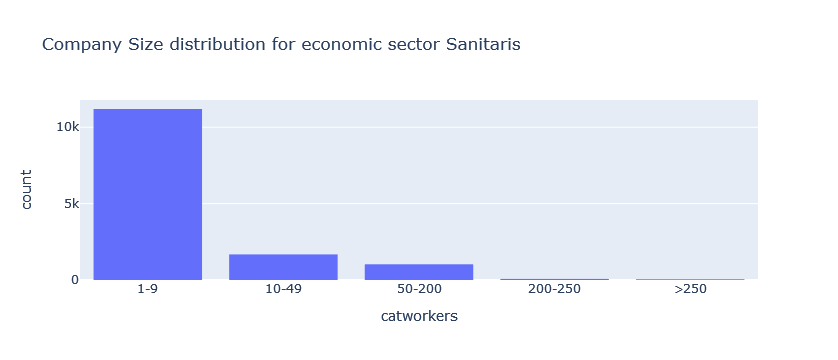

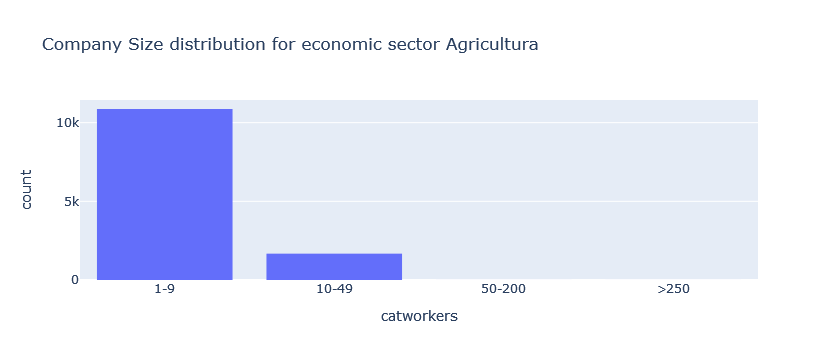

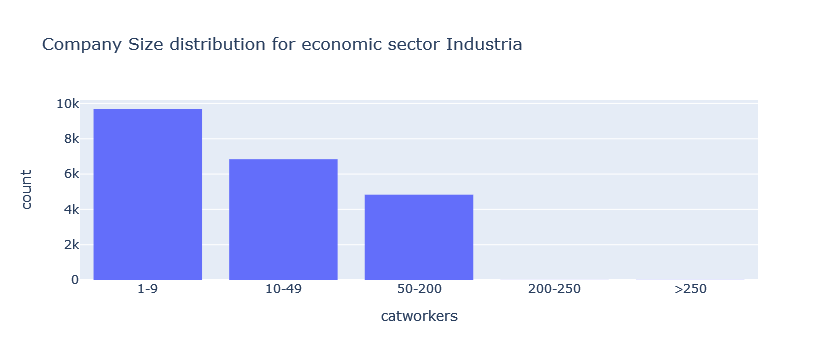

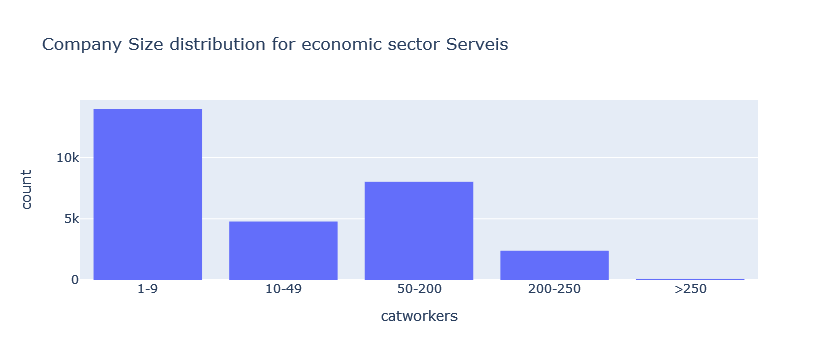

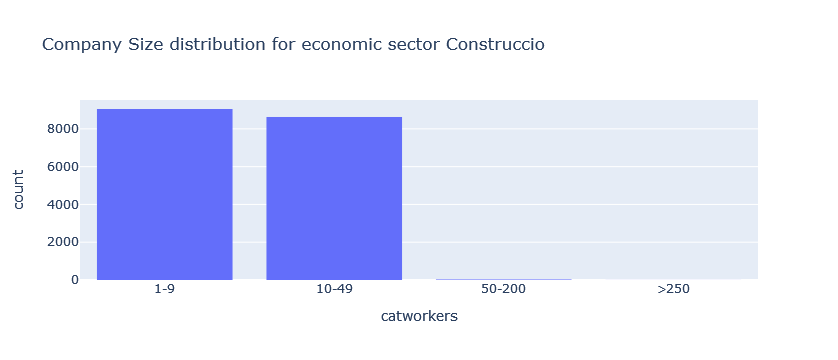

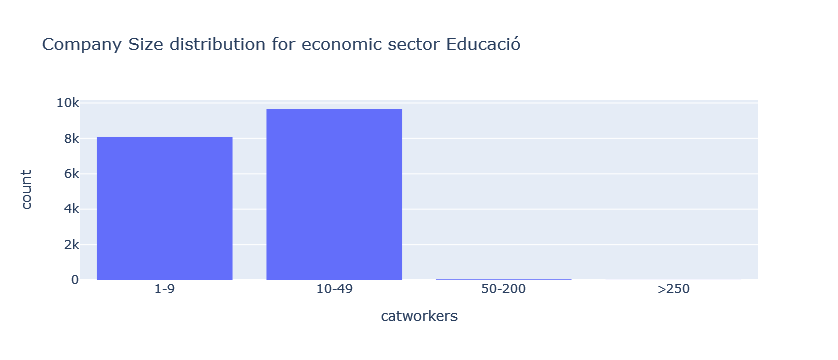

In [174]:
filterSanitaris = dfWorld5M2.SECTORECONOMIC == 'Sanitaris'
filterSectorPrimari = dfWorld5M2.SECTORECONOMIC == 'SectorPrimari'
filterIndustria = dfWorld5M2.SECTORECONOMIC == 'Industria'
filterServeis = dfWorld5M2.SECTORECONOMIC == 'Serveis'
filterConstruccio = dfWorld5M2.SECTORECONOMIC == 'Construccio'
filterEducacio = dfWorld5M2.SECTORECONOMIC == 'Educació'

filters = [filterSanitaris, filterSectorPrimari, filterIndustria, filterServeis, filterConstruccio, filterEducacio]
sectors = ['Sanitaris', 'Agricultura', 'Industria', 'Serveis', 'Construccio', 'Educació']

for i,j in zip(filters, sectors):
    tempdf = dfWorld5M2[i]
    
    tempdf2 = tempdf.groupby(['companyID'])['HomeID'].count().reset_index().rename(columns={'HomeID':'NofWorkers'})

    conditions = [
        (tempdf2.NofWorkers < 10),
        ((tempdf2.NofWorkers >= 10) & (tempdf2.NofWorkers < 50)),
        ((tempdf2.NofWorkers >= 50) & (tempdf2.NofWorkers < 200)),
        ((tempdf2.NofWorkers >= 200) & (tempdf2.NofWorkers < 250)),
        (tempdf2.NofWorkers >= 10)]

    choices = ['1-9', '10-49', '50-200', '200-250', '>250']

    tempdf2['catworkers'] = np.select(conditions, choices, 0)
    tempdf2 = tempdf2.sort_values(by=['NofWorkers'])
    fig = px.histogram(tempdf2, x="catworkers", category_orders=dict(day=['1-9', '10-49', '50-200', '200-250', '>250']),  title='Company Size distribution for economic sector ' + str(j))
    fig.show()        